# Avian Disease Prediction Analysis based on Government dashboard and external resources

This study will focus on using data from Death counts, 6 diagnosis: including Egg Peritonitis & Salpingiti, Colisepticaemia Yolk sac infection/ omphalitis, Broiler ascites, Red Mite, Marek's Disease and other resources such as weather, temperature, etc. based on regions to detect early case of outbreaks of Avian Disease on poultry and suggest prevention methods based on these findings.

Avian Disease dashboard:  https://public.tableau.com/app/profile/siu.apha/viz/AvianDashboard/Overview

## Data Dictionary

| Column               | Description                                                                                                        |
|:--------|:-------------------------------------------------------------------------------------------------------------------|
|                                                                            |
| Month      | The month in which data was collected                                                                                                         |
| Year     | The year in which data was collected                                                                       |
| 0 - 7 days     | The age in which data was collected                                                                             |    
| Immature     | The age in which data was collected                                                          |
| Adult     | The age in which data was collected                                |
| Scotland, East of England, South West, Wales, West Midlands, South East      | The subject's death count based on top 6 Regions                                                                            |
| Egg Peritonitis & Salpingitis, Colisepticaemia, Yolk sac infection/omphalitis, Broiler ascites, Red Mite, Neoplasm, Marek's Disease   | The subject's death count based on top 7 Diagnoses                                                                                                |
| Slaughter (Million birds)     | Number of birds raised for meat production                                                                           |
| Production (Thousand Tonnes)     | Total weight of poultry production                                                                             |    
| Eggs (Import/Export)     | Number of poultry eggs imported/exported monthly                                                           |
| Eggs RPI average price (per dozen)     | Average price per dozen eggs monthly                               |
| Max_temp, Min_temp, Days_of_frost, Hours of rainfall, Hours of sunshine    | Weather variables for top 6 regions                                                                                            |
| Total death     | Number of deaths counted       

## Explonatory Data 

For the second assignment, we added Precipitation for 5 Regions: Scotland, South East, South West, Wales, West Midlands.

Except for East of England where we have no records from MET OFFICE: https://www.metoffice.gov.uk/hadobs/hadukp/data/download.html

### Libraries

In [78]:
# Importing the libraries
import os
os.environ['OMP_NUM_THREADS'] = '1'
import warnings
warnings.filterwarnings('ignore')
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import matplotlib.dates as mdates
import statsmodels.api as sm
from datetime import datetime
from collections import defaultdict
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.dummy import DummyRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from IPython.display import display
from scipy.stats import shapiro
from scipy.stats import median_abs_deviation
from scipy.stats import norm
from scipy.stats import bootstrap
from scipy.stats import chi2_contingency
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

### Basic information

In [79]:
# Read the collected dataset
df = pd.read_excel ('AvianDataset.xlsx', sheet_name = 'Number')
df

,No.,Month,Year,0-7 days,Immature,Adult,Scotland,East of England,South West,Wales,...,Min_temp\nSouth East,Days of frost\nSouth East,Hours of rainfall\nSouth East,Hours of sunshine\nSouth East,Precipitation\nScotland,Precipitation\nSouthwest,Precipitation\nWales,Precipitation\nWest Midlands,Precipitation\nSouth East,Total death
0,1,1,2012,0,0,3,0,2,0,0,...,2.8,8.4,48.7,73.2,156.2,84.1,92.3,41.9,49.7,3
1,2,2,2012,0,1,2,2,0,0,0,...,0.3,14.5,19.3,83.7,81.0,40.6,46.1,20.5,19.9,3
2,3,3,2012,0,0,2,0,0,0,2,...,3.3,2.3,26.6,174.5,43.5,31.3,23.0,30.8,27.9,2
3,4,4,2012,0,1,3,0,0,0,0,...,3.4,4.4,133.8,155.7,124.1,153.7,98.8,125.4,130.0,4
4,5,5,2012,0,2,0,0,0,0,0,...,8.1,0.0,42.7,191.6,78.1,51.2,59.5,44.9,41.6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,8,2024,0,0,2,0,2,0,0,...,13.0,0.0,41.0,209.2,176.3,53.4,87.3,23.7,32.8,2
152,153,9,2024,0,1,1,1,0,0,0,...,10.6,0.0,157.4,129.8,91.1,168.7,146.2,122.1,141.3,2
153,154,10,2024,0,0,2,0,0,0,2,...,8.4,0.1,91.2,88.0,117.1,124.5,104.5,61.1,79.7,2
154,155,11,2024,0,0,0,0,0,0,0,...,5.0,5.7,87.9,54.0,77.1,122.2,69.2,51.4,73.5,0


In [80]:
# Replace \n with a space for clearer column names
pd.set_option('display.max_colwidth', None)
df.columns = df.columns.str.replace('\n', ' ')
df

,No.,Month,Year,0-7 days,Immature,Adult,Scotland,East of England,South West,Wales,...,Min_temp South East,Days of frost South East,Hours of rainfall South East,Hours of sunshine South East,Precipitation Scotland,Precipitation Southwest,Precipitation Wales,Precipitation West Midlands,Precipitation South East,Total death
0,1,1,2012,0,0,3,0,2,0,0,...,2.8,8.4,48.7,73.2,156.2,84.1,92.3,41.9,49.7,3
1,2,2,2012,0,1,2,2,0,0,0,...,0.3,14.5,19.3,83.7,81.0,40.6,46.1,20.5,19.9,3
2,3,3,2012,0,0,2,0,0,0,2,...,3.3,2.3,26.6,174.5,43.5,31.3,23.0,30.8,27.9,2
3,4,4,2012,0,1,3,0,0,0,0,...,3.4,4.4,133.8,155.7,124.1,153.7,98.8,125.4,130.0,4
4,5,5,2012,0,2,0,0,0,0,0,...,8.1,0.0,42.7,191.6,78.1,51.2,59.5,44.9,41.6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,8,2024,0,0,2,0,2,0,0,...,13.0,0.0,41.0,209.2,176.3,53.4,87.3,23.7,32.8,2
152,153,9,2024,0,1,1,1,0,0,0,...,10.6,0.0,157.4,129.8,91.1,168.7,146.2,122.1,141.3,2
153,154,10,2024,0,0,2,0,0,0,2,...,8.4,0.1,91.2,88.0,117.1,124.5,104.5,61.1,79.7,2
154,155,11,2024,0,0,0,0,0,0,0,...,5.0,5.7,87.9,54.0,77.1,122.2,69.2,51.4,73.5,0


In [81]:
# Show the first 5 rows of this data set
pd.set_option('display.max_colwidth', None)
df.head()

,No.,Month,Year,0-7 days,Immature,Adult,Scotland,East of England,South West,Wales,...,Min_temp South East,Days of frost South East,Hours of rainfall South East,Hours of sunshine South East,Precipitation Scotland,Precipitation Southwest,Precipitation Wales,Precipitation West Midlands,Precipitation South East,Total death
0,1,1,2012,0,0,3,0,2,0,0,...,2.8,8.4,48.7,73.2,156.2,84.1,92.3,41.9,49.7,3
1,2,2,2012,0,1,2,2,0,0,0,...,0.3,14.5,19.3,83.7,81.0,40.6,46.1,20.5,19.9,3
2,3,3,2012,0,0,2,0,0,0,2,...,3.3,2.3,26.6,174.5,43.5,31.3,23.0,30.8,27.9,2
3,4,4,2012,0,1,3,0,0,0,0,...,3.4,4.4,133.8,155.7,124.1,153.7,98.8,125.4,130.0,4
4,5,5,2012,0,2,0,0,0,0,0,...,8.1,0.0,42.7,191.6,78.1,51.2,59.5,44.9,41.6,2


In [82]:
# Show the last 5 rows of this data set
pd.set_option('display.max_colwidth', None)
df.tail()

,No.,Month,Year,0-7 days,Immature,Adult,Scotland,East of England,South West,Wales,...,Min_temp South East,Days of frost South East,Hours of rainfall South East,Hours of sunshine South East,Precipitation Scotland,Precipitation Southwest,Precipitation Wales,Precipitation West Midlands,Precipitation South East,Total death
151,152,8,2024,0,0,2,0,2,0,0,...,13.0,0.0,41.0,209.2,176.3,53.4,87.3,23.7,32.8,2
152,153,9,2024,0,1,1,1,0,0,0,...,10.6,0.0,157.4,129.8,91.1,168.7,146.2,122.1,141.3,2
153,154,10,2024,0,0,2,0,0,0,2,...,8.4,0.1,91.2,88.0,117.1,124.5,104.5,61.1,79.7,2
154,155,11,2024,0,0,0,0,0,0,0,...,5.0,5.7,87.9,54.0,77.1,122.2,69.2,51.4,73.5,0
155,156,12,2024,0,0,2,0,2,0,0,...,4.6,0.8,51.3,22.6,208.9,85.8,146.7,66.3,49.1,2


In [83]:
# Show basic information for numerical columns
def extended_stats(df):
    stats = df.describe().T
    
    stats['variance'] = stats['std'] ** 2
    stats['range'] = stats['max'] - stats['min']
    stats['IQR'] = stats['75%'] - stats['25%']
    
    final_stats = stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'variance', 'range', 'IQR']]
    return final_stats.T.style.format(precision=4, na_rep='N/A')

extended_stats(df)

,No.,Month,Year,0-7 days,Immature,Adult,Scotland,East of England,South West,Wales,West Midlands,South East,Egg Peritonitis & Salpingitis,Colisepticaemia,Yolk sac infection/ omphalitis,Broiler ascites,Red Mite,Neoplasm,Marek's Disease,Slaughter (Million birds),Production (Thousand tonnes),Eggs Import (Million Dozen),Eggs Export (Million Dozen),Eggs RPI average price (per dozen),Max_temp Scotland,Min_temp Scotland,Days of frost Scotland,Hours of rainfall Scotland,Hours of sunshine Scotland,Max_temp East of England,Min_temp East of England,Days of frost East of England,Hours of rainfall East of England,Hours of sunshine East of England,Max_temp Southwest,Min_temp Southwest,Days of frost Southwest,Hours of rainfall Southwest,Hours of sunshine Southwest,Max_temp Wales,Min_temp Wales,Days of frost Wales,Hours of rainfall Wales,Hours of sunshine Wales,Max_temp West Midlands,Min_temp West Midlands,Days of frost West Midlands,Hours of rainfall West Midlands,Hours of sunshine West Midlands,Max_temp South East,Min_temp South East,Days of frost South East,Hours of rainfall South East,Hours of sunshine South East,Precipitation Scotland,Precipitation Southwest,Precipitation Wales,Precipitation West Midlands,Precipitation South East,Total death
count,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000,156.0000
mean,78.5000,6.5000,2018.0000,0.2179,0.9295,1.4038,0.9487,0.4487,0.1923,0.1731,0.1923,0.1282,0.2564,0.2115,0.1731,0.1282,0.1346,0.1218,0.1154,84.7571,154.1705,12.9942,2.2141,271.6026,11.3032,4.5910,5.7147,131.5635,101.5808,15.0218,6.7276,3.0814,53.7231,139.3660,14.0301,6.8026,2.6654,111.1462,127.9128,13.2494,6.2276,3.2949,126.7846,117.9058,14.1397,6.1962,3.4731,71.9256,126.5218,15.1000,6.8583,3.1083,71.3436,139.6660,123.6974,95.4538,96.1250,59.0673,67.8147,2.5513
std,45.1774,3.4632,3.7537,0.6937,2.0132,1.5231,1.7989,0.9318,0.4966,0.6134,0.5578,0.5044,0.5312,0.6223,0.5101,0.4781,0.4412,0.3653,0.3929,13.4136,21.9253,2.3821,4.6926,40.1601,4.4561,3.6712,5.9790,56.1064,52.8171,5.6277,4.1286,4.4373,26.9467,65.6970,4.6154,3.6641,3.6831,57.9224,65.7252,4.6012,3.6654,4.2489,63.8746,63.0516,5.2682,3.9538,4.6918,34.9184,60.9566,5.3613,4.0191,4.3890,41.0253,69.8067,50.9237,50.2185,45.9036,28.7756,37.5738,2.8967
min,1.0000,1.0000,2012.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,52.6000,118.4000,6.8000,0.5000,207.0000,3.2000,-2.0000,0.0000,30.3000,18.5000,5.5000,-0.5000,0.0000,2.8000,27.3000,6.3000,0.2000,0.0000,12.1000,23.0000,5.5000,-0.7000,0.0000,14.5000,19.6000,5.2000,-0.8000,0.0000,6.7000,25.9000,6.0000,-0.5000,0.0000,2.8000,21.1000,24.5000,10.1000,12.4000,5.5000,2.1000,0.0000
25%,39.7500,3.7500,2015.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,74.8250,137.0750,11.4750,0.9000,233.7500,7.3000,1.3750,0.1000,89.1250,55.0250,9.9500,3.2000,0.0000,32.7750,79.6000,9.8750,3.5000,0.0000,63.6750,67.3500,9.1000,3.0000,0.0000,77.4500,60.3250,9.2000,2.7750,0.0000,45.3750,75.4750,10.1750,3.3000,0.0000,40.6000,75.0750,84.0000,54.7500,60.6250,37.6250,38.8500,0.0000
50%,78.5000,6.5000,2018.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,85.6500,152.2500,13.0000,1.3500,272.5000,11.0000,4.0000,4.2000,125.2500,102.8500,14.4000,6.5000,0.6000,50.9500,139.3500,13.6500,6.3000,0.8500,102.8500,125.4500,13.1500,5.7500,1.5500,122.1500,119.5500,13.9500,5.8000,0.7500,66.3500,123.0000,14.8000,6.

In [84]:
df.shape

(156, 60)

This dataset has 156 rows and 55 columns

In [85]:
df.columns

Index(['No.', 'Month', 'Year', '0-7 days', 'Immature', 'Adult', 'Scotland',
       'East of England', 'South West', 'Wales', 'West Midlands', 'South East',
       'Egg Peritonitis & Salpingitis', 'Colisepticaemia',
       'Yolk sac infection/ omphalitis', 'Broiler ascites', 'Red Mite',
       'Neoplasm', 'Marek's Disease', 'Slaughter (Million birds)',
       'Production (Thousand tonnes)', 'Eggs Import (Million Dozen)',
       'Eggs Export (Million Dozen)', 'Eggs RPI average price (per dozen)',
       'Max_temp Scotland', 'Min_temp Scotland', 'Days of frost Scotland',
       'Hours of rainfall Scotland', 'Hours of sunshine Scotland',
       'Max_temp East of England', 'Min_temp East of England',
       'Days of frost East of England', 'Hours of rainfall East of England',
       'Hours of sunshine East of England', 'Max_temp Southwest',
       'Min_temp Southwest', 'Days of frost Southwest',
       'Hours of rainfall Southwest', 'Hours of sunshine Southwest',
       'Max_temp Wales', 'M

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 60 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   No.                                 156 non-null    int64  
 1   Month                               156 non-null    int64  
 2   Year                                156 non-null    int64  
 3   0-7 days                            156 non-null    int64  
 4   Immature                            156 non-null    int64  
 5   Adult                               156 non-null    int64  
 6   Scotland                            156 non-null    int64  
 7   East of England                     156 non-null    int64  
 8   South West                          156 non-null    int64  
 9   Wales                               156 non-null    int64  
 10  West Midlands                       156 non-null    int64  
 11  South East                          156 non-n

All columns have no null values.

In [87]:
# Check for missing values
# Calculate missing values per column
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

# Create a missing values summary
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percent.round(2)
})

# Display only columns with missing values
print("MISSING VALUES SUMMARY:")
display(missing_df[missing_df['Missing Values'] > 0].sort_values('Missing Values', ascending=False))

MISSING VALUES SUMMARY:


,Missing Values,Percentage


There are no missing value.

In [88]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


### Descriptive analysis

#### Detecting outliers

In [89]:
# Find and show only columns with outliers
def get_outlier(df):
    results = []
    
    for col in df.select_dtypes(include='number').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR
        outlier_count = ((df[col] < lower) | (df[col] > upper)).sum()
        
        if outlier_count > 0:
            results.append({
                'Column': col,
                'Outliers': outlier_count,
                'Total': len(df[col]),
                'Outlier%': f"{(outlier_count/len(df[col])):.1%}"
            })
    
    return pd.DataFrame(results)
    
outlier_df = get_outlier(df)
outlier_df 

,Column,Outliers,Total,Outlier%
0,0-7 days,22,156,14.1%
1,Immature,19,156,12.2%
2,Adult,5,156,3.2%
3,Scotland,23,156,14.7%
4,East of England,6,156,3.8%
5,South West,24,156,15.4%
6,Wales,16,156,10.3%
7,West Midlands,22,156,14.1%
8,South East,13,156,8.3%
9,Egg Peritonitis & Salpingitis,34,156,21.8%


This step is just to detect outliers, we won't remove any of this to keep our data comprehensive and accurate from 2012 to 2024.

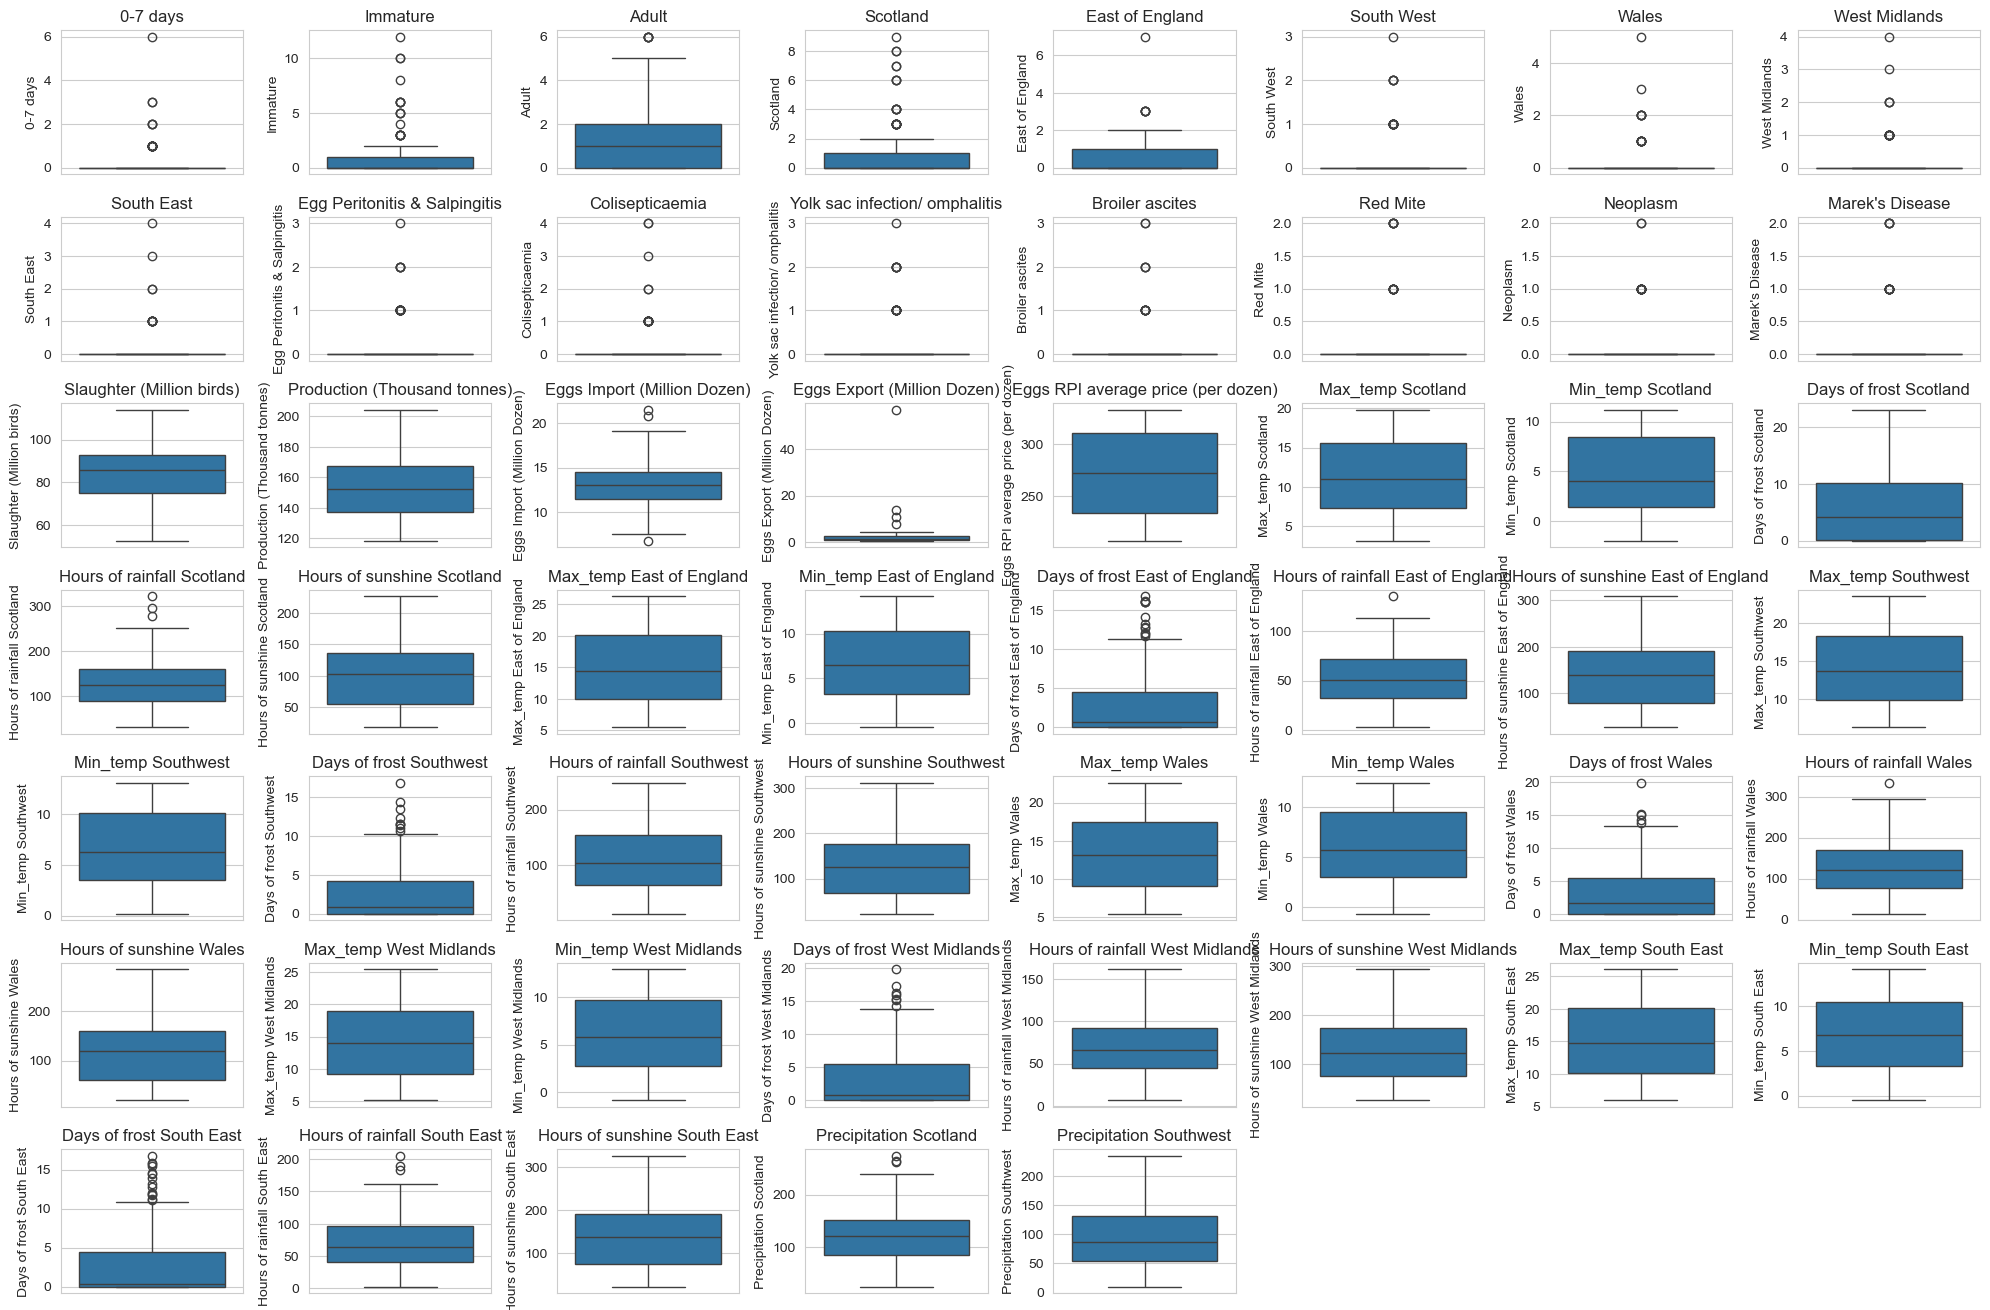

In [90]:
# Visualize distributions to identify outliers
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.select_dtypes(include=['int64', 'float64']).columns[3:56], 1):
    plt.subplot(8, 8, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

#### Correlation Analysis

##### Correlation visualization

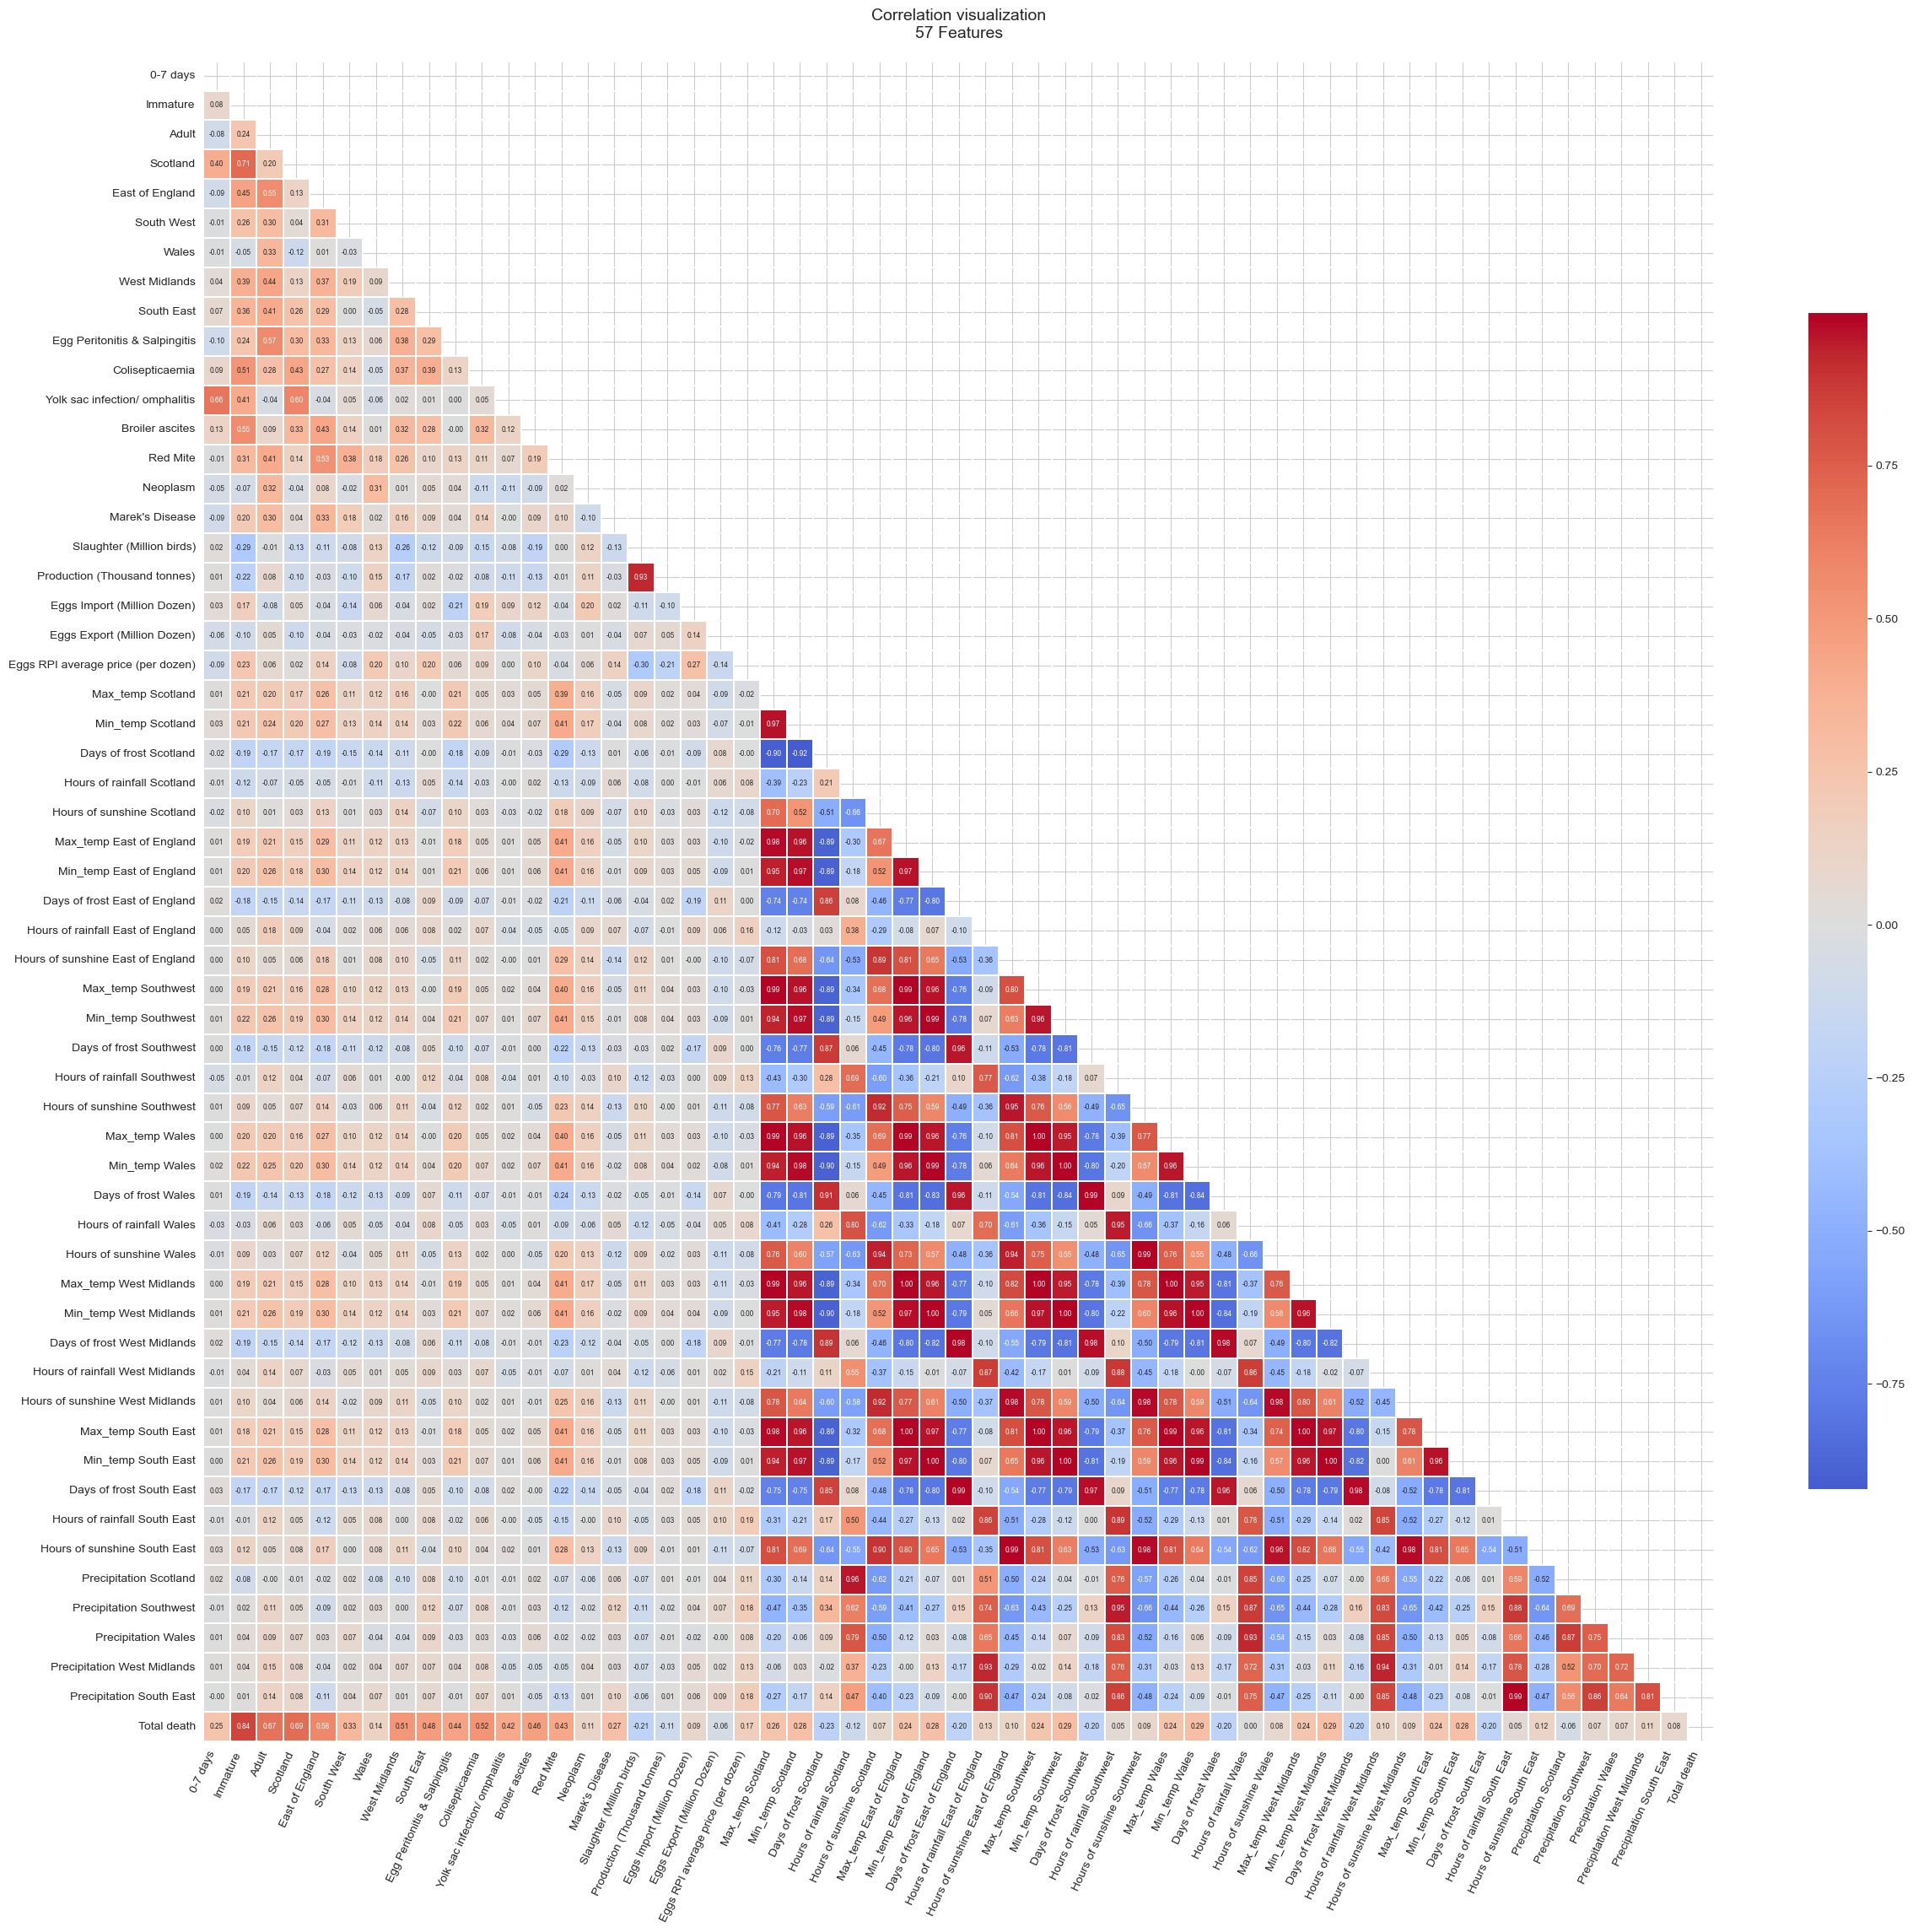

In [91]:
def correlation_visual(df, exclude_cols=3, correlation_threshold=0.7, figsize=(25, 23)):
   
    numeric_cols = df.select_dtypes(include=['number']).columns
    analyzed_cols = numeric_cols[exclude_cols:]
    corr_matrix = df[analyzed_cols].corr()
    
    plt.figure(figsize=figsize)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle
    
    # Create heatmap 
    ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', mask=mask,
                    annot_kws={'size': 6}, linewidths=0.1, cbar_kws={'shrink': 0.7})
    
    plt.xticks(rotation=65, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.title(f'Correlation visualization\n{len(analyzed_cols)} Features', 
              pad=20, fontsize=14)
    plt.tight_layout()
    plt.show()

correlation_results = correlation_visual(df)

##### Correlation rankings between all variables (excluding weather - weather pairs due to high correlation with each other)

In [111]:
def correlation_rankings(df, threshold=0.5):

    # Exclude first 3 columns
    numeric_cols = df.select_dtypes(include='number').columns[3:]
    temp_df = df[numeric_cols].copy()
    
    # Exclude weather features to be compared with each other
    weather_keywords = ['max', 'min', 'days of frost', 'hours', 'precipitation']
    weather_cols = [col for col in numeric_cols 
                   if any(kw in col.lower() for kw in weather_keywords)]
    
    # Calculate upper triangle of correlation matrix
    corr = temp_df.corr().abs()
    np.fill_diagonal(corr.values, np.nan) 
    
    results = []
    for i in range(len(numeric_cols)):
        for j in range(i+1, len(numeric_cols)):
            col1, col2 = numeric_cols[i], numeric_cols[j]
            
            # Skip weather-weather pairs
            if (col1 in weather_cols) and (col2 in weather_cols):
                continue
                
            corr_value = temp_df[col1].corr(temp_df[col2]) 
            if abs(corr_value) >= threshold:
                results.append({'Feature 1': col1, 'Feature 2': col2, 'Correlation': corr_value})
    
    return pd.DataFrame(results).sort_values('Correlation', key=abs, ascending=False)

results = correlation_rankings(df, threshold=0.2)
results.style.background_gradient(cmap='coolwarm', subset=['Correlation'])

,Feature 1,Feature 2,Correlation
130,Slaughter (Million birds),Production (Thousand tonnes),0.926595
24,Immature,Total death,0.841964
4,Immature,Scotland,0.706222
55,Scotland,Total death,0.692606
48,Adult,Total death,0.673066
1,0-7 days,Yolk sac infection/ omphalitis,0.658499
52,Scotland,Yolk sac infection/ omphalitis,0.600354
76,East of England,Total death,0.579395
31,Adult,Egg Peritonitis & Salpingitis,0.572878
12,Immature,Broiler ascites,0.552334


Slaughter (Million birds) and Production (Thousand tonnes) have a high correlation of 92.65%.
 => We will check for p-value to determine which one to exclude.

##### Calculate p-value to check which one can better explained Total death

In [93]:
def chi2_test(df, predictor, target='Total death'):
    crosstab = pd.crosstab(df[predictor], df[target])
    chi2, p, dof, _ = chi2_contingency(crosstab)
    return chi2, p, dof

# Calculate values for 2 features
slaughter_chi2, slaughter_p, slaughter_dof = chi2_test(df, 'Slaughter (Million birds)')
production_chi2, production_p, production_dof = chi2_test(df, 'Production (Thousand tonnes)')

print("Slaughter vs Deaths:") 
print(f"χ²({slaughter_dof}) = {slaughter_chi2:.2f}, p = {slaughter_p:.4f}")

print("\nProduction vs Deaths:")
print(f"χ²({production_dof}) = {production_chi2:.2f}, p = {production_p:.4f}")

Slaughter vs Deaths:
χ²(1680) = 1654.89, p = 0.6642

Production vs Deaths:
χ²(2016) = 2034.82, p = 0.3798


Both features have p-value of more than 0.05 => There is NO strong relationship (p > 0.05) between Slaughter (Million birds), Production (Thousand tonnes) and Total death.

##### Correlation rankings from all variables against Total death - Choose 15 from most correlated

In [94]:
# Rank the correlation of al features with "Total death"
def death_correlation_ranking(df, death_col="Total death", top_n=15):
   
    corr_series = df.corr(numeric_only=True)[death_col]
    
    results = pd.DataFrame({
        'Feature': corr_series.index,
        'Correlation': corr_series.values
    }).drop(index=corr_series.index.get_loc(death_col)) 
    
    return {
        'raw_ranking': results.sort_values('Correlation', ascending=False).head(top_n),
        'absolute_ranking': (
            results.assign(AbsCorrelation=lambda x: np.abs(x['Correlation']))
            .sort_values('AbsCorrelation', ascending=False)
            .head(top_n)
            .drop(columns=['AbsCorrelation']))}


death_rankings = death_correlation_ranking(df)
print("Top Correlations (Directional):")
display(death_rankings['raw_ranking'].round(3))

print("\nTop Correlations (Absolute Strength):")
display(death_rankings['absolute_ranking'].round(3))

Top Correlations (Directional):


,Feature,Correlation
4,Immature,0.842
6,Scotland,0.693
5,Adult,0.673
7,East of England,0.579
13,Colisepticaemia,0.522
10,West Midlands,0.509
11,South East,0.481
15,Broiler ascites,0.461
12,Egg Peritonitis & Salpingitis,0.444
16,Red Mite,0.426



Top Correlations (Absolute Strength):


,Feature,Correlation
4,Immature,0.842
6,Scotland,0.693
5,Adult,0.673
7,East of England,0.579
13,Colisepticaemia,0.522
10,West Midlands,0.509
11,South East,0.481
15,Broiler ascites,0.461
12,Egg Peritonitis & Salpingitis,0.444
16,Red Mite,0.426


#### Avian Mortality trends by Year

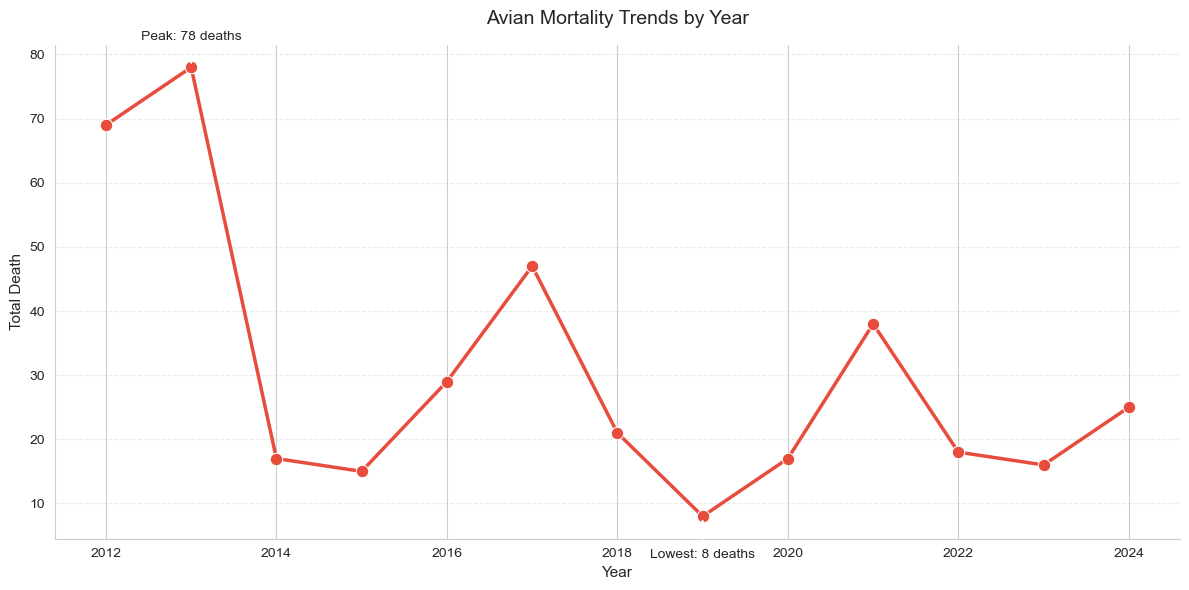

In [95]:
yearly_deaths = df.groupby('Year')['Total death'].sum().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=yearly_deaths, x='Year', y='Total death', color='#e74c3c', linewidth=2.5, marker='o', markersize=9)

ax.yaxis.grid(True, linestyle='--', alpha=0.4)
ax.spines[['top', 'right']].set_visible(False)

# Find extreme points
peak = yearly_deaths.loc[yearly_deaths['Total death'].idxmax()]
lowest = yearly_deaths.loc[yearly_deaths['Total death'].idxmin()]

def annotate_point(year, death_count, label, y_offset=20):
    ax.annotate(f"{label}: {death_count:,} deaths", xy=(year, death_count), xytext=(0, y_offset), textcoords='offset points', ha='center',
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3'), bbox=dict(boxstyle='round,pad=0.3', fc='white'))

annotate_point(peak['Year'], peak['Total death'], "Peak", 20)
annotate_point(lowest['Year'], lowest['Total death'], "Lowest", -30)

plt.title('Avian Mortality Trends by Year', fontsize=14, pad=15)
plt.xlabel('Year', fontsize=11)
plt.ylabel('Total Death', fontsize=11)
plt.tight_layout()
plt.show()

Death count reach the highest peak in 2013 with 78 cases across UK, then decrease and reach another peak every 4 years: 2013, 2017, 2021.

Lowest death count recorded was in 2019 with only 8 cases.

#### Avian Mortality trend by Age

##### Visualisation

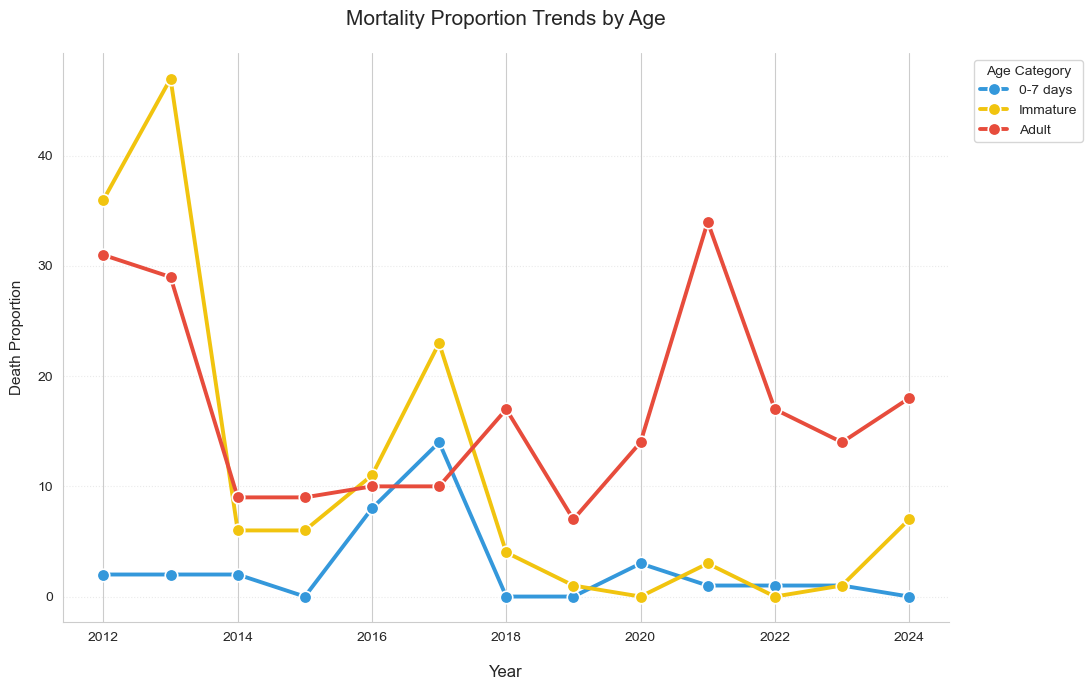

In [96]:
yearly_data = df.groupby('Year')[['0-7 days', 'Immature', 'Adult']].sum().reset_index()

fig, ax = plt.subplots(1, 1, figsize=(13, 7))

# Color palette
color_palette = ['#3498db', '#f1c40f', '#e74c3c']  # Blue, Yellow, Red
age_categories = ['0-7 days', 'Immature', 'Adult']

# Plot each line without data labels
for idx, age in enumerate(age_categories):
    ax.plot(yearly_data['Year'], yearly_data[age], color=color_palette[idx], marker='o', markersize=9, 
            linewidth=2.8, markeredgecolor='white', markeredgewidth=1.2, label=age)

# Styling
ax.spines[['top', 'right']].set_visible(False)  
ax.grid(axis='y', linestyle=':', alpha=0.4)    
ax.set_ylabel('Death Proportion', fontsize=11, labelpad=10)
ax.set_xlabel('Year', fontsize=12, labelpad=15)
ax.set_title('Mortality Proportion Trends by Age', fontsize=15, pad=20)
ax.legend(title="Age Category", loc='upper left', bbox_to_anchor=(1.02, 1))

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

We can clearly see the pattern from above Age graph:
1. The proportion of 0-7 days is the lowest compared to Immature, Adult, reached the highest peak in 2017 then remained low until the end of 2024.
2. Immature age group started extremely high, decreased, peaked again in 2017 then dropped significantly in 2018. After that the number remains relatively low but showed a steady increase from 2023 to 2024.
3. Adult: started close to "Immature" group then reached a high peak in 2021, gradually increased from 2022-2023 but showed a steady increase in 2024.

##### Rankings by Age

In [97]:
age_cols = ['0-7 days', 'Immature', 'Adult']


death_by_age = df.groupby('Year')[age_cols].sum()
total_deaths_by_age = death_by_age.sum(axis=0) 

# Calculate yearly rankings
# Rank age groups within each year (row). 1 = highest deaths. Using 'min' rank for ties.
rankings = death_by_age.rank(axis=1, ascending=False, method='min').astype(int)

age_rank_table = rankings.T
age_rank_table['Total #1 Rankings'] = (age_rank_table == 1).sum(axis=1)

# Add the Total Deaths column
age_rank_table['Total Deaths'] = age_rank_table.index.map(total_deaths_by_age)

# Sort age groups primarily by the number of times they were ranked #1 then by Total death
age_rank_table = age_rank_table.sort_values(
    by=['Total #1 Rankings', 'Total Deaths'],
    ascending=[False, False])

# Reset index to make the age group name a regular column
age_rank_table = age_rank_table.reset_index()

# Rename the 'index' column to 'Age Group'
if 'index' in age_rank_table.columns:
     age_rank_table = age_rank_table.rename(columns={'index': 'Age Group'})
elif age_rank_table.index.name in age_rank_table.columns:
     age_rank_table = age_rank_table.rename(columns={age_rank_table.index.name: 'Age Group'})

display(
    age_rank_table.style
    .format({'Total Deaths': "{:,}", 
        **{col: "{:.0f}" for col in age_rank_table.columns if isinstance(col, (int, float)) and col not in ['Total #1 Rankings', 'Total Deaths']}
        })
    .set_caption("Age Group Ranking Summary with Total Deaths (1 = Highest Deaths)")
    .highlight_min(subset=[col for col in age_rank_table.columns if isinstance(col, (int, float)) and col not in ['Total #1 Rankings', 'Total Deaths']],
                   color='lightgreen', axis=0)
    .background_gradient(subset=['Total Deaths'], cmap='Greens'))

Year,Age Group,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Total #1 Rankings,Total Deaths
0,Adult,2,2,1,1,2,3,1,1,1,1,1,1,1,9,219
1,Immature,1,1,2,2,1,1,2,2,3,2,3,2,2,4,145
2,0-7 days,3,3,3,3,3,2,3,3,2,3,2,2,3,0,34


Adult age group remained the top age group affected by Avian disease, followed by Immature then 0-days age group.

#### Avian Mortality trend by Region

##### Visualization

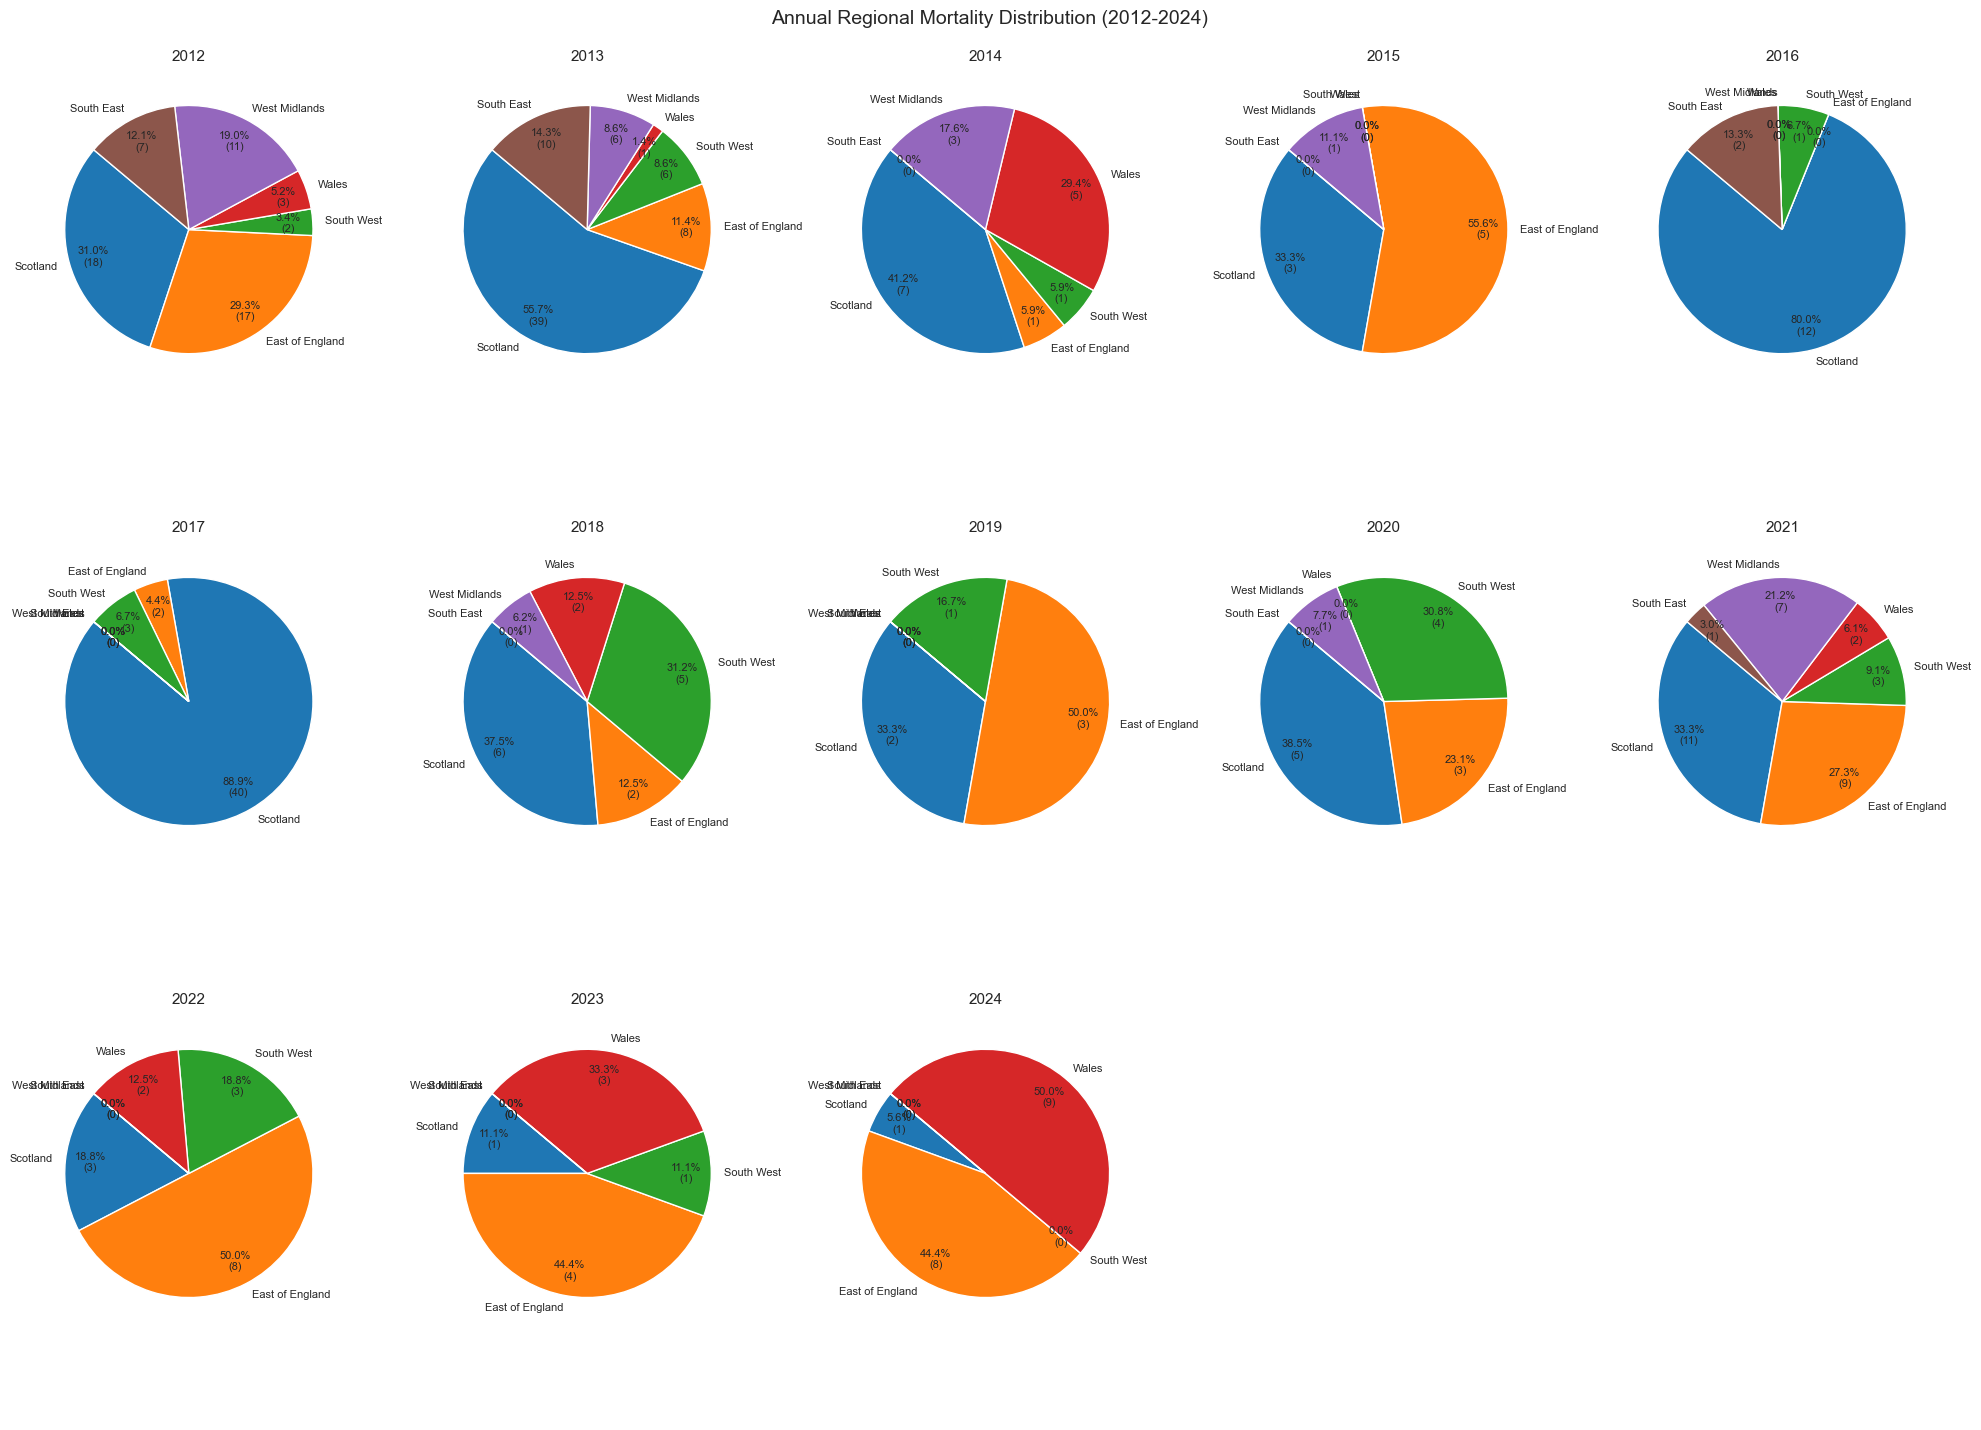

In [98]:
regions = df.columns[6:12]
year_col = 'Year'  

fig, axes = plt.subplots(3, 5, figsize=(20, 15))
axes = axes.flatten()

for idx, year in enumerate(range(2012, 2025)):
    yearly_data = df[df[year_col] == year][regions].sum() 
    
    def autopct_format(pct):
        total = yearly_data.sum()
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({val:,})'
    
    axes[idx].pie(yearly_data, labels=regions, autopct=autopct_format if yearly_data.sum() > 0 else None,
        startangle=140, pctdistance=0.8, textprops={'fontsize': 8})
    axes[idx].set_title(f'{year}', pad=10, fontsize=11)

for ax in axes[len(range(2012, 2024)):]:
    ax.axis('off')

plt.suptitle('Annual Regional Mortality Distribution (2012-2024)', y=0.95, fontsize=14)
plt.tight_layout()
plt.show()

##### Ranking by Year - Region

In [99]:
region_cols = df.columns[6:12]
death_by_region = df.groupby('Year')[region_cols].sum()

# Calculate total deaths per region across all years
total_deaths_by_region = death_by_region.sum(axis=0) # Sum each column (region) vertically

# Calculate yearly rankings
# Rank regions within each year (row). 1 = highest deaths. Using 'min' rank for ties.
rankings = death_by_region.rank(axis=1, ascending=False, method='min').astype(int)

# Prepare the ranking table
# Transpose so regions are rows and years are columns
region_rank_table = rankings.T

# Add column counting how many times each region was ranked #1
region_rank_table['Total #1 Rankings'] = (region_rank_table == 1).sum(axis=1)

# Add the Total Deaths column
# Use the index (region names) to map the total death counts
region_rank_table['Total Deaths'] = region_rank_table.index.map(total_deaths_by_region)

# Sort and finalize the table
# Sort regions primarily by the number of times they were ranked #1 then Total Deaths as a secondary sort criterion
region_rank_table = region_rank_table.sort_values(
    by=['Total #1 Rankings', 'Total Deaths'], 
    ascending=[False, False])

# Reset index to make the region name a regular column
region_rank_table = region_rank_table.reset_index()

# Rename the 'index' column to 'Region'
if 'index' in region_rank_table.columns:
     region_rank_table = region_rank_table.rename(columns={'index': 'Region'})
elif region_cols.name in region_rank_table.columns: # If the original index had a name
     region_rank_table = region_rank_table.rename(columns={region_cols.name: 'Region'})
    
display(
    region_rank_table.style
    .format({
        'Total Deaths': "{:,}", 
        **{col: "{:.0f}" for col in region_rank_table.columns if isinstance(col, int) or isinstance(col, float)}
        })
    .set_caption("Region Ranking Summary with Total Deaths (1 = Highest Deaths)")
    .highlight_min(subset=[col for col in region_rank_table.columns if isinstance(col, int)], color='lightgreen', axis=0)
    .background_gradient(subset=['Total Deaths'], cmap='Blues'))

Year,Region,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Total #1 Rankings,Total Deaths
0,Scotland,1,1,1,2,1,1,1,2,1,1,2,3,3,8,148
1,East of England,2,3,4,1,4,3,3,1,3,2,1,1,2,4,70
2,Wales,5,6,2,4,4,4,3,4,5,5,4,2,1,1,27
3,South West,6,4,4,4,3,2,2,3,2,4,2,3,4,0,30
4,West Midlands,3,4,3,3,4,4,5,4,4,3,5,5,4,0,30
5,South East,4,2,6,4,2,4,6,4,5,6,5,5,4,0,20


##### Visualization based on Month - Region

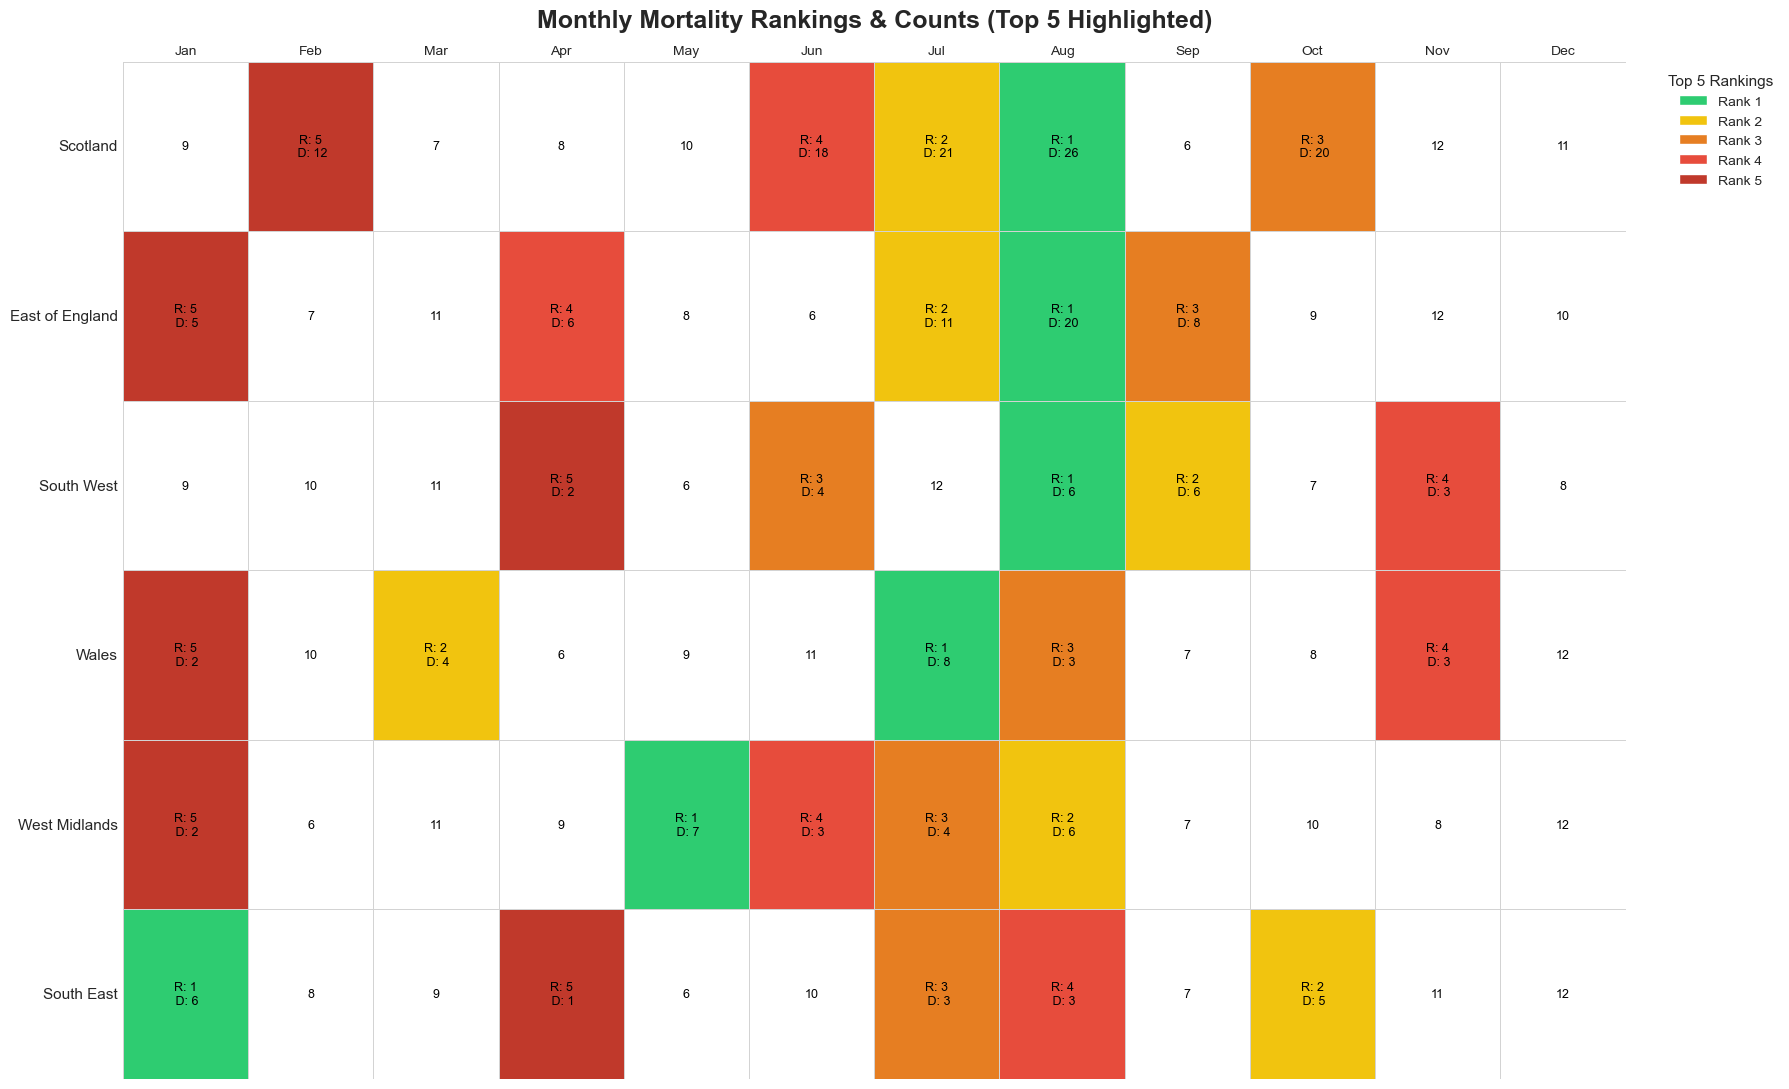

In [100]:
if len(df.columns) > 11:
    region_cols = df.columns[6:12]
else:
    print("Warning: DataFrame has fewer than 12 columns. Adjust 'region_cols' slicing.")
    region_cols = df.columns[6:]

# Create DataFrames for ranking and actual death counts
full_ranking = pd.DataFrame(index=region_cols, columns=range(1, 13), dtype='float64')
death_counts = pd.DataFrame(index=region_cols, columns=range(1, 13), dtype='float64')

# Calculate ranks and store death counts
for region in region_cols:
    if region in df.columns:
        monthly_totals = df.groupby('Month')[region].sum()
        monthly_totals = monthly_totals.reindex(range(1, 13), fill_value=0) # Ensure all 12 months

        # Store actual death counts
        death_counts.loc[region] = monthly_totals

        # Calculate ranks using 'first' to break ties uniquely
        full_ranking.loc[region] = monthly_totals.rank(ascending=False, method='first')
    else:
        print(f"Warning: Column '{region}' not found in DataFrame.")

# Fill potential NaNs and convert types
num_regions = len(region_cols)
full_ranking = full_ranking.fillna(num_regions + 1).astype('int64')
death_counts = death_counts.fillna(0).astype('int64') # Fill NaN counts with 0

# --- Create Custom Annotations ---
# Initialize annotation matrix with empty strings or rank numbers
annot_matrix = pd.DataFrame(index=region_cols, columns=range(1, 13), dtype=object)

for r_idx, region in enumerate(region_cols):
    for m_idx, month in enumerate(range(1, 13)):
        rank = full_ranking.loc[region, month]
        deaths = death_counts.loc[region, month]

        if pd.notna(rank) and rank <= 5:
            # Format for top 5: Rank and Deaths (consider formatting deaths e.g., with commas)
            annot_matrix.iloc[r_idx, m_idx] = f"R: {rank}\n D: {deaths:,}"
        elif pd.notna(rank):
             # Format for others: Just the Rank
            annot_matrix.iloc[r_idx, m_idx] = f"{rank}"
        else:
            annot_matrix.iloc[r_idx, m_idx] = "" 


# --- Visualization ---
top5_colors = ['#2ecc71', '#f1c40f', '#e67e22', '#e74c3c', '#c0392b']
cmap_colors = top5_colors + ['white'] * (num_regions - 5)
cmap = ListedColormap(cmap_colors)

plt.figure(figsize=(20, 11)) # Slightly larger figure size for readability

# Base heatmap
ax = sns.heatmap(full_ranking,  cmap=['white'],  annot=annot_matrix,  fmt='s', linewidths=0.5, linecolor='lightgray',
    annot_kws={'color': 'black','fontsize': 9, 'va': 'center'}, cbar=False)

# Overlay heatmap for top 5 rank colors
sns.heatmap(full_ranking, cmap=cmap, annot=False, mask=full_ranking > 5,
    linewidths=0.5, linecolor='lightgray', vmin=1, vmax=num_regions, cbar=False, ax=ax)

# --- Formatting ---
plt.title("Monthly Mortality Rankings & Counts (Top 5 Highlighted)", pad=25, fontsize=18, weight='bold')
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.set_xticklabels(month_names, fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=11)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.tick_params(axis='both', which='major', length=0)

legend_elements = [
    Patch(facecolor=top5_colors[i], label=f'Rank {i+1}')
    for i in range(min(5, num_regions))]

if legend_elements:
    plt.legend(handles=legend_elements, bbox_to_anchor=(1.02, 1), loc='upper left',
        title='Top 5 Rankings', frameon=False, fontsize=10, title_fontsize=11)

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig('detailed_ranking_visual.png', dpi=300, bbox_inches='tight')
plt.show()

August is the top month for Avian disease, followed closely by July.

We should look at the dataset from May to September which counted for many deaths of Avian.

Top months across all regions:

August: 6

July: 5

Jan: 4

April: 3

June: 3

#### Avian Mortality trend by Diagnoses

##### Visualization by Year - Diagnoses

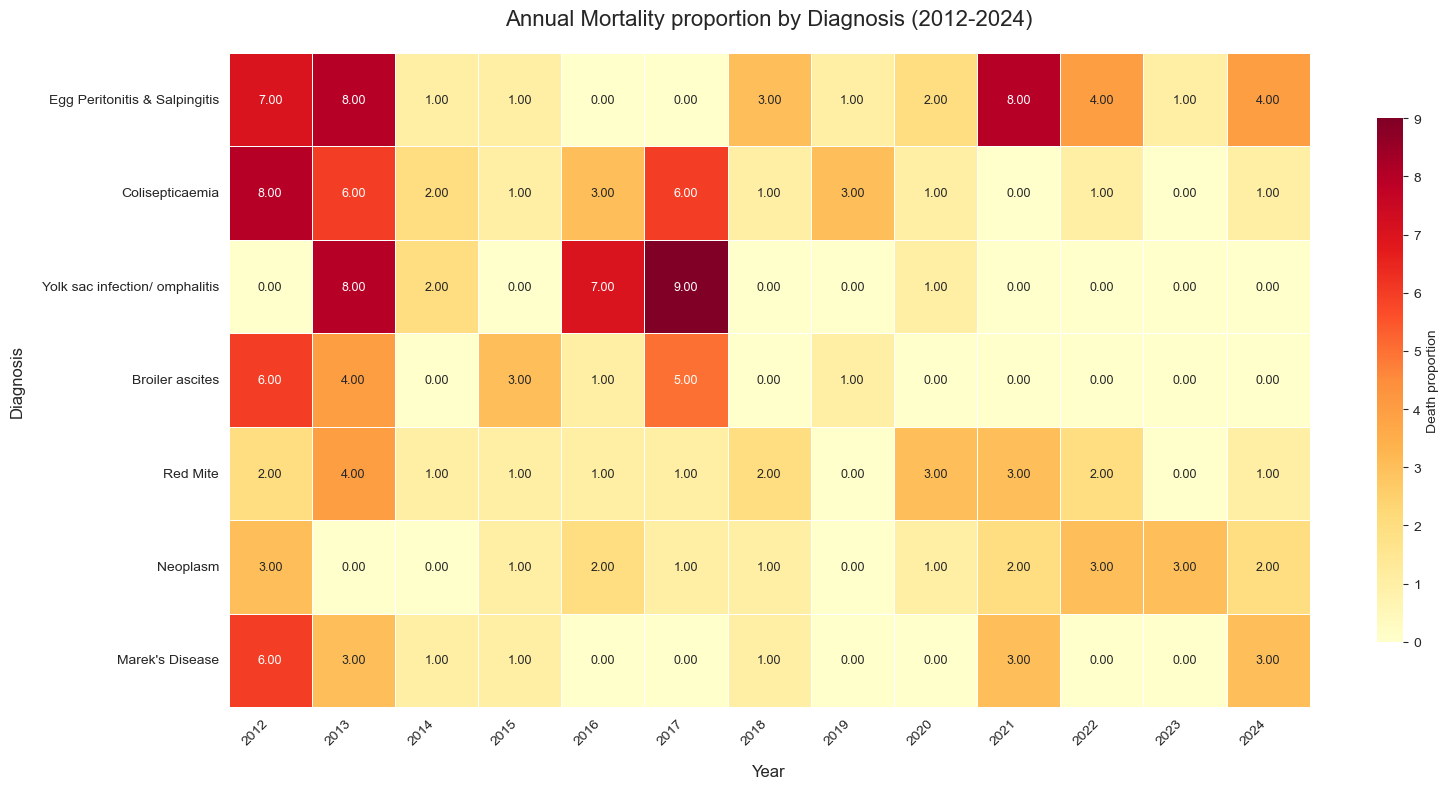

In [101]:
diagnoses = df.columns[12:19]
heatmap_data = df.groupby('Year')[diagnoses].sum().T  

plt.figure(figsize=(16, 8))
ax = sns.heatmap(heatmap_data,annot=True,fmt=".2f", cmap="YlOrRd", linewidths=0.5, linecolor="white", 
                 annot_kws={"size": 9}, cbar_kws={"label": "Death proportion", "shrink": 0.8})

ax.set_title("Annual Mortality proportion by Diagnosis (2012-2024)", pad=20, fontsize=16)
ax.set_xlabel("Year", labelpad=12, fontsize=12)
ax.set_ylabel("Diagnosis", labelpad=12, fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

##### Rankings by Year - Diagnoses

In [102]:
diagnosis_cols = df.columns[12:19]
death_by_diagnoses = df.groupby('Year')[diagnosis_cols].sum()

total_deaths_by_diagnosis = death_by_diagnoses.sum(axis=0)

rankings = death_by_diagnoses.rank(axis=1, ascending=False, method='min').astype(int)
diagnoses_rank_table = rankings.T

diagnoses_rank_table['Total #1 Rankings'] = (diagnoses_rank_table == 1).sum(axis=1)
diagnoses_rank_table['Total Deaths'] = diagnoses_rank_table.index.to_series().map(total_deaths_by_diagnosis)
diagnoses_rank_table = diagnoses_rank_table.sort_values(by=['Total #1 Rankings', 'Total Deaths'], ascending=[False, False])
diagnoses_rank_table = diagnoses_rank_table.reset_index()

if 'index' in diagnoses_rank_table.columns:
    diagnoses_rank_table = diagnoses_rank_table.rename(columns={'index': 'Diagnosis'})

display(
    diagnoses_rank_table.style
    .format({'Total Deaths': "{:,}"})
    .set_caption("Diagnoses Ranking Summary with Total Deaths (1 = Highest Deaths)")
    .highlight_min(subset=[col for col in diagnoses_rank_table.select_dtypes(include='number').columns], color='lightgreen', axis=0)
    .background_gradient(subset=['Total Deaths'], cmap='Reds')
)

Year,Diagnosis,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Total #1 Rankings,Total Deaths
0,Egg Peritonitis & Salpingitis,2,1,3,2,6,6,1,2,2,1,1,2,1,5,40
1,Yolk sac infection/ omphalitis,7,1,1,7,1,1,6,4,3,5,5,3,6,4,27
2,Colisepticaemia,1,3,1,2,2,2,3,1,3,5,4,3,4,3,33
3,Red Mite,6,4,3,2,4,4,2,4,1,2,3,3,4,1,21
4,Broiler ascites,3,4,6,1,4,3,6,2,6,5,5,3,6,1,20
5,Neoplasm,5,7,6,2,3,4,3,4,3,4,2,1,3,1,19
6,Marek's Disease,3,6,3,2,6,6,3,4,6,2,5,3,2,0,18


Egg Pertonitis & Salpingitis is the top 1 diagnosis for Avian, followed by Yolk sac infection with 4 number 1s in 13 years, even though death count is less than Coliseticaemia.

#### Avian trend by Economic and Market features

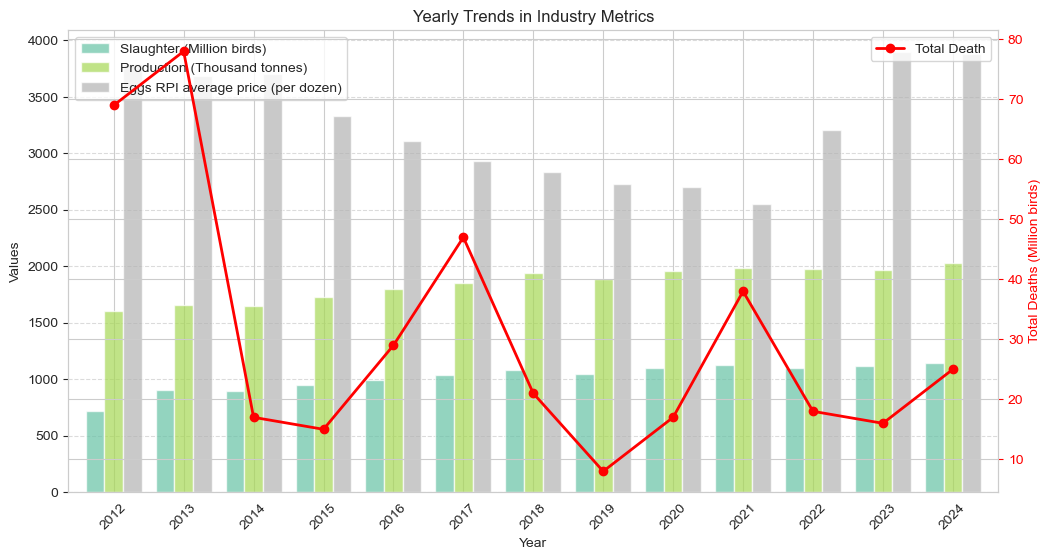

In [103]:
# Visualisation for Economic features: Slaughter, Production, Egg price (per dozen)
df_grouped = df.groupby("Year").sum()

bar_features = ['Slaughter (Million birds)', 'Production (Thousand tonnes)', 
                'Eggs RPI average price (per dozen)']
line_feature = 'Total death'

sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(12, 6))

years = df_grouped.index.astype(str)  

# Creating bar plot for economic features
df_grouped[bar_features].plot(kind="bar", ax=ax1, width=0.8, alpha=0.7, colormap="Set2")

# Creating line plot for 'Total death'
ax2 = ax1.twinx()
ax2.plot(years, df_grouped[line_feature], color="red", marker="o", linestyle="-", linewidth=2, label="Total Death")
ax2.set_ylabel("Total Deaths (Million birds)", color="red")
ax2.tick_params(axis='y', colors='red')

ax1.set_xlabel("Year")
ax1.set_ylabel("Values")
ax1.set_title("Yearly Trends in Industry Metrics")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

ax1.set_xticklabels(years, rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

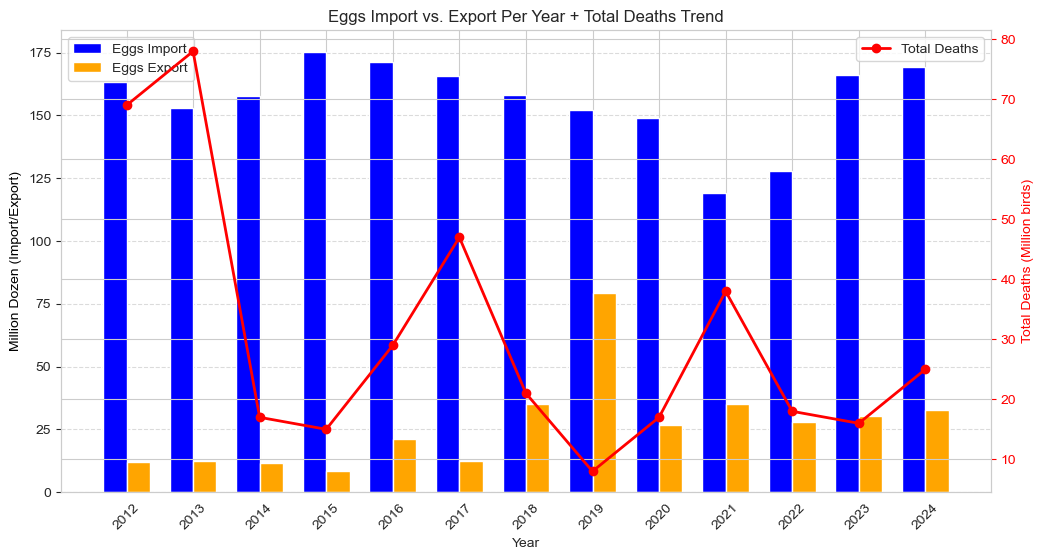

In [104]:
# Visualize Import/Export against Total death
df_grouped = df.groupby("Year").sum()

years = df_grouped.index
import_values = df_grouped['Eggs Import (Million Dozen)']
export_values = df_grouped['Eggs Export (Million Dozen)']
death_values = df_grouped['Total death']  # Assuming this represents total deaths

# Set bar width and positions
bar_width = 0.35
x = np.arange(len(years))
              
fig, ax1 = plt.subplots(figsize=(12, 6))

# Creating bar plots for Import/Export
ax1.bar(x - bar_width/2, import_values, bar_width, label="Eggs Import", color='blue')
ax1.bar(x + bar_width/2, export_values, bar_width, label="Eggs Export", color='orange')
ax1.set_xlabel("Year")
ax1.set_ylabel("Million Dozen (Import/Export)", color='black')
ax1.tick_params(axis='y')

# Create secondary y-axis for "Total death"
ax2 = ax1.twinx()
ax2.plot(x, death_values, marker='o', color='red', linewidth=2, label="Total Deaths")
ax2.set_ylabel("Total Deaths (Million birds)", color='red')
ax2.tick_params(axis='y', colors='red')

ax1.set_xticks(x)
ax1.set_xticklabels(years, rotation=45)
ax1.set_title("Eggs Import vs. Export Per Year + Total Deaths Trend")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
ax1.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

#### Avian Mortality trend by Weather features

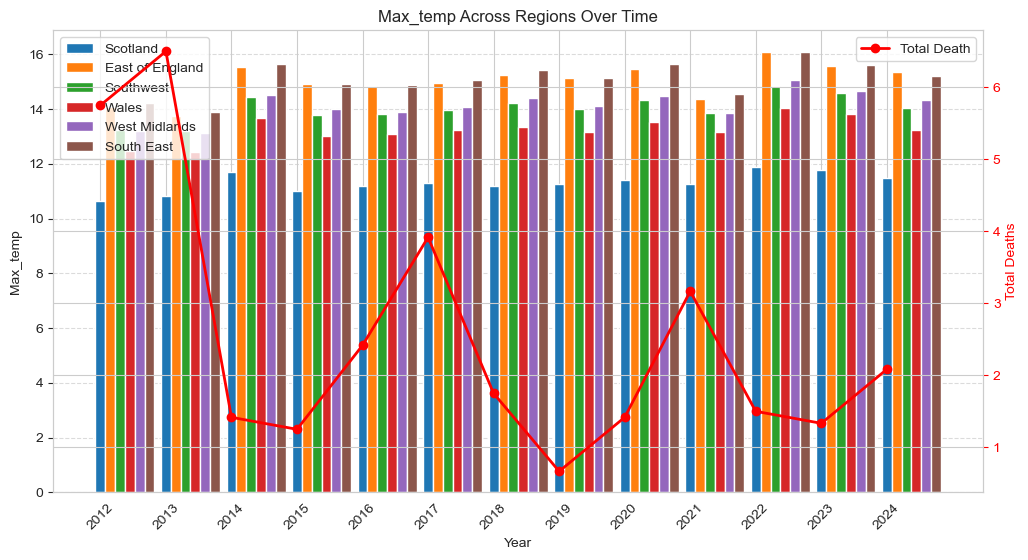

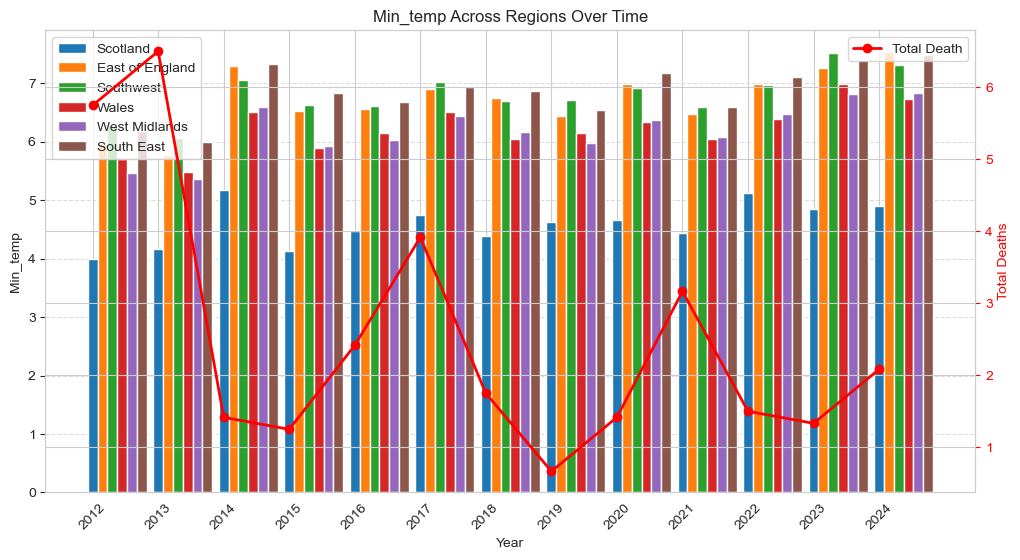

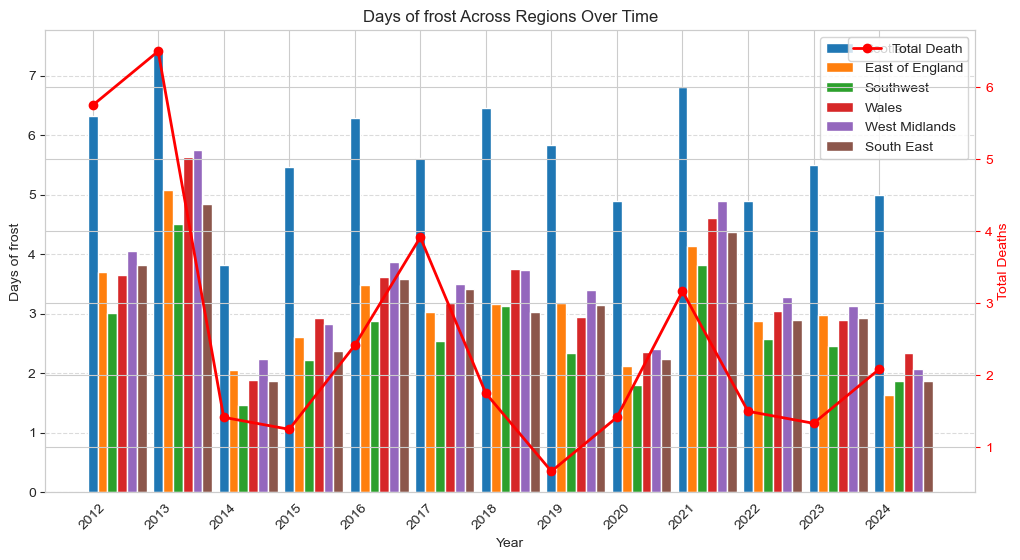

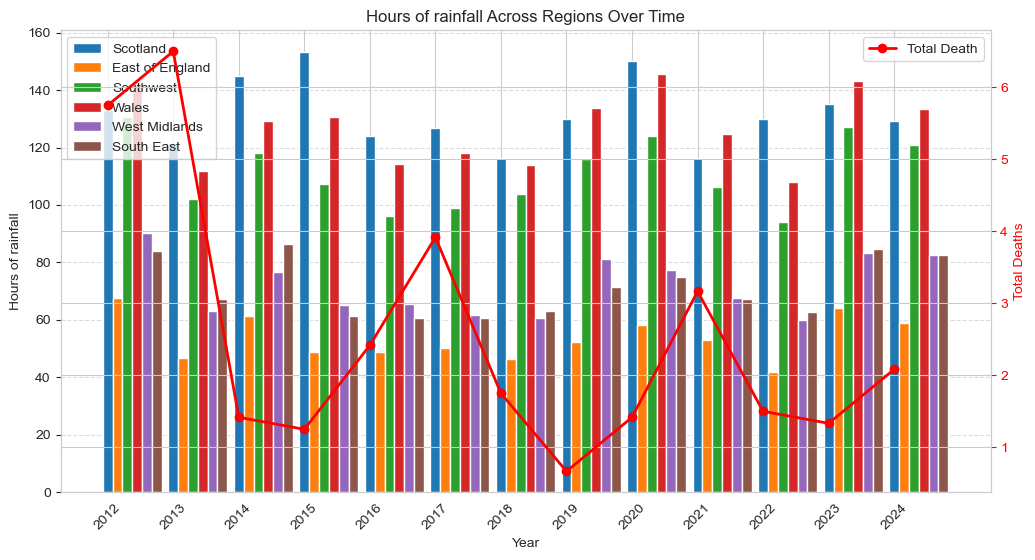

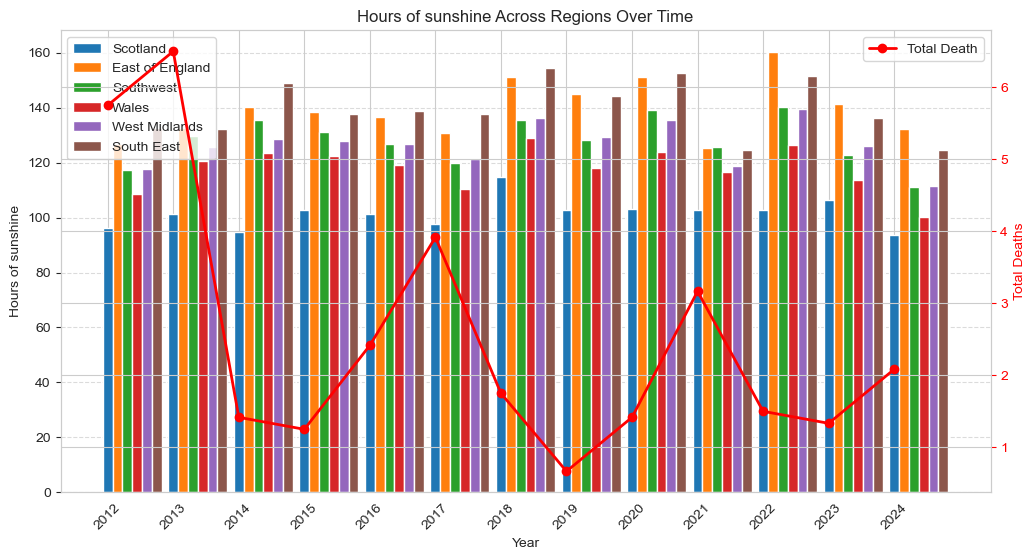

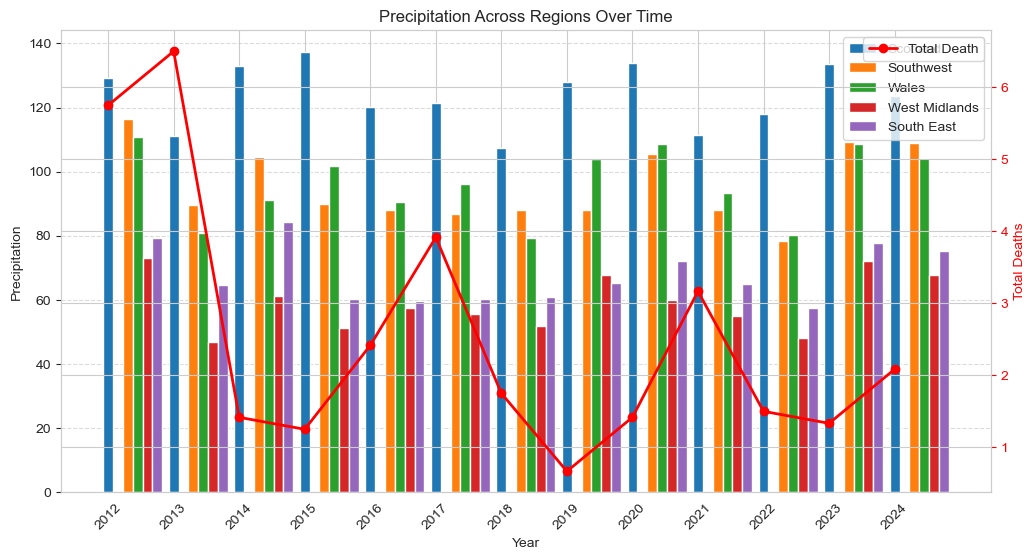

In [112]:
# Group by year
df_grouped = df.groupby("Year").mean()

weather_categories = ["Max_temp", "Min_temp", "Days of frost", "Hours of rainfall", "Hours of sunshine", "Precipitation"]
regions = ["Scotland", "East of England", "Southwest", "Wales", "West Midlands", "South East"]
line_feature = "Total death"

# Loop through each weather category dynamically
for weather_feature in weather_categories:
    plt.figure(figsize=(12, 6))

    # Generate grouped bar plot for different regions
    bar_width = 0.15
    x = np.arange(len(df_grouped.index)) 
    for i, region in enumerate(regions):
        feature_name = f"{weather_feature} {region}" 
        if feature_name in df_grouped.columns:
            plt.bar(x + (i * bar_width), df_grouped[feature_name], width=bar_width, label=region)

    plt.xlabel("Year")
    plt.ylabel(weather_feature)
    plt.title(f"{weather_feature} Across Regions Over Time")
    plt.xticks(ticks=x, labels=df_grouped.index.astype(str), rotation=45)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Overlay Total Deaths as a line plot
    ax2 = plt.gca().twinx()  
    ax2.plot(x, df_grouped[line_feature], color="red", marker="o", linestyle="-", linewidth=2, label="Total Death")
    ax2.set_ylabel("Total Deaths", color="red")
    ax2.tick_params(axis='y', colors='red')
    ax2.legend(loc="upper right")

    plt.show()

In [106]:
region_cols = df.columns[6:12]  # Columns 7-12 (0-based index 6-11) - VERIFY THESE ARE YOUR REGIONS

month_names = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

top_data = []

for region in region_cols:
    # Select relevant columns first
    region_df_subset = df[['Year', 'Month', region]]

    # Sort, take top 30, and assign region name
    region_top = (region_df_subset
                  .sort_values(by=[region, 'Year', 'Month'], ascending=[False, True, True])
                  .head(30)
                  .assign(Region=region)) 

    # Create the combined 'Value' string
    region_top['Value'] = (
        region_top[region].astype(str) + " (" +
        region_top['Year'].astype(str) + "-" +
        region_top['Month'].map(month_names).fillna('Unknown') + ")")

    top_data.append(region_top[['Region', 'Value']])

# Combine data from all regions
combined = pd.concat(top_data, ignore_index=True) # ignore_index is good practice here

# Add rank within each region group
combined['Rank'] = combined.groupby('Region').cumcount() + 1

# Pivot to the final table format
final_table = (combined
               .pivot(index='Rank', columns='Region', values='Value')
               .rename_axis(None, axis=1) 
               .reset_index() # Make 'Rank' a regular column
              )

pd.set_option('display.width', 1000)     
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None) 

print(final_table.to_string(index=False))

 Rank East of England     Scotland   South East   South West        Wales West Midlands
    1    7 (2012-Aug) 9 (2013-Aug) 4 (2013-Jan) 3 (2013-Sep) 5 (2024-Jul)  4 (2012-Aug)
    2    3 (2012-Sep) 8 (2013-Jun) 3 (2013-Oct) 2 (2012-Aug) 3 (2023-Aug)  3 (2021-Jul)
    3    3 (2013-Sep) 8 (2017-Aug) 2 (2012-Jul) 2 (2013-May) 2 (2012-Mar)  2 (2012-May)
    4    3 (2020-Aug) 7 (2013-Oct) 2 (2012-Aug) 2 (2018-Sep) 2 (2014-Jan)  2 (2014-May)
    5    3 (2022-Jul) 7 (2017-Apr) 1 (2012-Jan) 2 (2020-Aug) 2 (2018-Jul)  2 (2021-Jun)
    6    3 (2022-Aug) 6 (2012-Jun) 1 (2012-Sep) 1 (2013-Jun) 2 (2024-Mar)  1 (2012-Feb)
    7    2 (2012-Jan) 6 (2013-Jul) 1 (2012-Oct) 1 (2014-Jan) 2 (2024-Oct)  1 (2012-Apr)
    8    2 (2012-Jun) 6 (2017-Jul) 1 (2013-Apr) 1 (2016-Aug) 1 (2012-Sep)  1 (2012-Sep)
    9    2 (2012-Oct) 4 (2012-Oct) 1 (2013-Jul) 1 (2017-Jun) 1 (2013-Nov)  1 (2012-Oct)
   10    2 (2013-Aug) 4 (2017-Jan) 1 (2013-Aug) 1 (2017-Sep) 1 (2014-Apr)  1 (2012-Nov)
   11    2 (2015-Jan) 4 (2017-Fe

### Inferential Analysis

#### Distribution Testing

##### Distribution visualisation

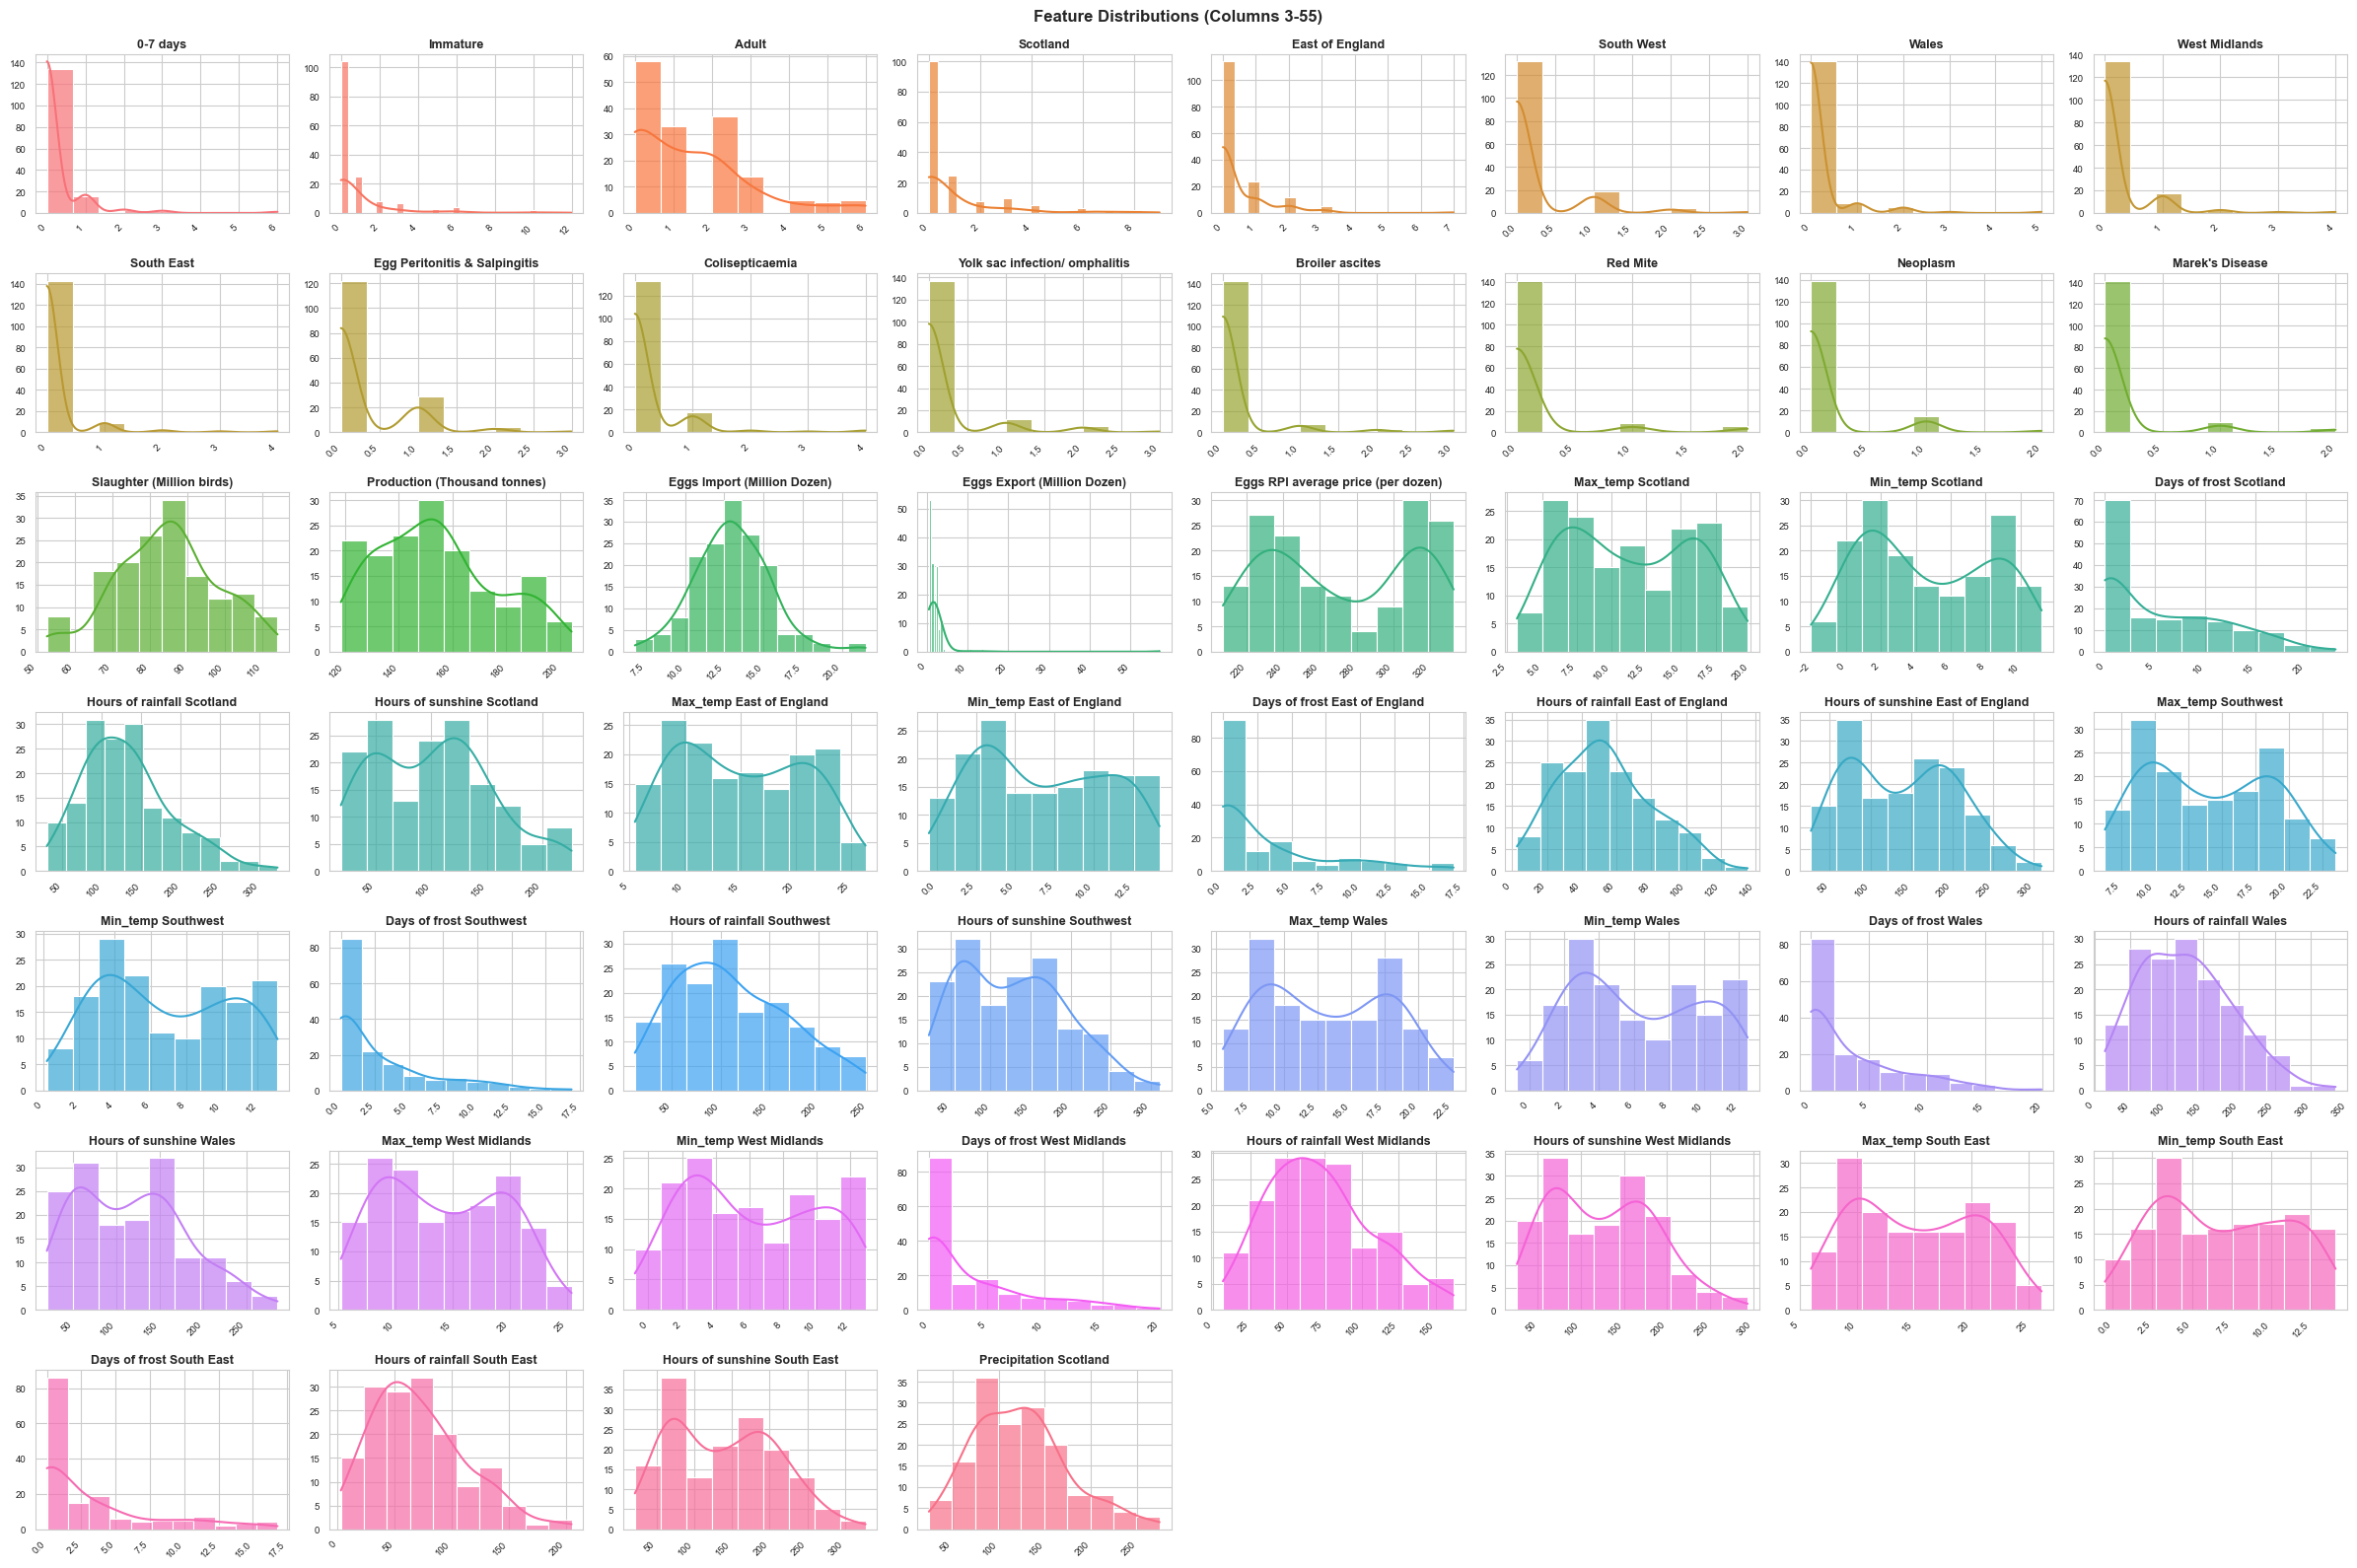

In [108]:
# Check distribution for all columns

plt.figure(figsize=(24, 16))
plt.subplots_adjust(hspace=0.6, wspace=0.3) 

num_cols = df.select_dtypes(include=np.number).columns[3:55]

palette = sns.color_palette("husl", len(num_cols))

for i, col in enumerate(num_cols, 1):
    ax = plt.subplot(7, 8, i)
    
    sns.histplot(df[col], kde=True, color=palette[i % len(palette)], linewidth=0.8, edgecolor='white', alpha=0.7)
    
    ax.set_title(col, fontsize=9, pad=5, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(labelsize=7)
    
    plt.xticks(rotation=45, ha='right', fontsize=7)
    
for j in range(i, 56):
    plt.delaxes(plt.subplot(7, 8, j+1))

plt.suptitle('Feature Distributions (Columns 3-55)', y=0.99, fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

From histogram above: Eggs Imported, Slaughter, Hours of rainfall (East of England)  have a rather normal distribution.
However, we will generate a table using p-value to determine the normality for more accuracy.

##### Distribution based on p-value

In [109]:
def normality_test(data, alpha=0.05):
    """Returns normality decision and p-value"""
    clean_data = data.dropna()
    if len(clean_data) < 3:
        return ("N/A", np.nan)  # Not enough data
    _, p = st.shapiro(clean_data)
    decision = "Normal" if p > alpha else "Non-normal"
    return (decision, p)

# Calculate results for all numeric columns
test_results = df.select_dtypes(include=np.number).apply(normality_test)

# Split into separate DataFrames
normality_df = pd.DataFrame({
    'Normality': test_results.apply(lambda x: x[0]),
    'p-value': test_results.apply(lambda x: x[1])
}).T  # Transpose to get features as columns

# Style with conditional formatting
def highlight_normality(row):
    styles = []
    for val in row:
        if isinstance(val, str):
            if val == "Normal":
                styles.append('background-color: #DFF0D8; color: #3C763D')
            elif val == "Non-normal":
                styles.append('background-color: #F2DEDE; color: #A94442')
            else:
                styles.append('background-color: #F5F5F5; color: #666')
        else:  # p-values
            styles.append('font-family: monospace')
    return styles

styled_df = (
    normality_df.style
    .apply(highlight_normality, axis=1)
    .format({'p-value': "{:.4e}"}, na_rep="N/A")
    .set_caption("Normality Analysis")
)

# Display
display(styled_df)

,No.,Month,Year,0-7 days,Immature,Adult,Scotland,East of England,South West,Wales,West Midlands,South East,Egg Peritonitis & Salpingitis,Colisepticaemia,Yolk sac infection/ omphalitis,Broiler ascites,Red Mite,Neoplasm,Marek's Disease,Slaughter (Million birds),Production (Thousand tonnes),Eggs Import (Million Dozen),Eggs Export (Million Dozen),Eggs RPI average price (per dozen),Max_temp Scotland,Min_temp Scotland,Days of frost Scotland,Hours of rainfall Scotland,Hours of sunshine Scotland,Max_temp East of England,Min_temp East of England,Days of frost East of England,Hours of rainfall East of England,Hours of sunshine East of England,Max_temp Southwest,Min_temp Southwest,Days of frost Southwest,Hours of rainfall Southwest,Hours of sunshine Southwest,Max_temp Wales,Min_temp Wales,Days of frost Wales,Hours of rainfall Wales,Hours of sunshine Wales,Max_temp West Midlands,Min_temp West Midlands,Days of frost West Midlands,Hours of rainfall West Midlands,Hours of sunshine West Midlands,Max_temp South East,Min_temp South East,Days of frost South East,Hours of rainfall South East,Hours of sunshine South East,Precipitation Scotland,Precipitation Southwest,Precipitation Wales,Precipitation West Midlands,Precipitation South East,Total death
Normality,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Normal,Non-normal,Normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal,Non-normal
p-value,0.000057,0.000004,0.000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.061082,0.000100,0.075073,0.000000,0.000000,0.000004,0.000001,0.000000,0.000355,0.000287,0.000021,0.000003,0.000000,0.023030,0.000078,0.000015,0.000002,0.000000,0.000994,0.000167,0.000013,0.000002,0.000000,0.009225,0.000115,0.000026,0.000002,0.000000,0.003465,0.000234,0.000018,0.000007,0.000000,0.000180,0.000124,0.002320,0.001351,0.013870,0.005135,0.000916,0.000000


Only Slaughter and Eggs Import are normally distributed.

#### Confidence Intervals

In [1]:
def safe_median_ci(df, start_col=3, end_col=55, ci=0.95, n_samples=1000):

    end_col = min(end_col, df.shape[1] - 1)

    if start_col > end_col or start_col >= df.shape[1]:
        print(f"Warning: start_col ({start_col}) is invalid or exceeds DataFrame bounds ({df.shape[1]-1}). Returning empty DataFrame.")
        return pd.DataFrame(index=['Median', 'CI_Lower', 'CI_Upper', 'Valid_N'])

    columns_to_process = df.iloc[:, start_col:end_col+1].columns
    results = pd.DataFrame(index=['Median', 'CI_Lower', 'CI_Upper', 'Valid_N'],
                           columns=columns_to_process)

    for col in results.columns:
        try:
            # Convert to numeric, coerce errors to NaN, drop NaNs, get numpy array
            sample = pd.to_numeric(df[col], errors='coerce').dropna().values
            n = len(sample) # This line should be at the same level as 'sample ='
            results.loc['Valid_N', col] = n

            # If no valid numeric data after cleaning, skip calculations
            if n == 0:
                results.loc[['Median', 'CI_Lower', 'CI_Upper'], col] = np.nan # Explicitly set NaN
                # print(f"Skipping {col}: No valid numeric data.") # Optional warning
                continue

            # Calculate median
            med = np.median(sample)
            results.loc['Median', col] = med

            # Calculate bootstrap CI only if enough data points
            if n >= 5: 
                # Generate bootstrap samples of the median
                boot_medians = [
                    np.median(np.random.choice(sample, size=n, replace=True))
                    for _ in range(n_samples)
                ]
                # Calculate percentiles for the confidence interval
                alpha = (1 - ci) / 2
                results.loc['CI_Lower', col] = np.percentile(boot_medians, 100 * alpha)
                results.loc['CI_Upper', col] = np.percentile(boot_medians, 100 * (1 - alpha))
            else:
                # Not enough data for reliable CI
                results.loc[['CI_Lower', 'CI_Upper'], col] = np.nan
                # print(f"Skipping CI for {col}: Insufficient data (n={n}).") # Optional warning

        except Exception as e:
     
            print(f"Skipping column '{col}' due to unexpected error: {str(e)}")
            results.loc[['Median', 'CI_Lower', 'CI_Upper', 'Valid_N'], col] = np.nan # Set all to NaN on error
            continue

    return results.apply(pd.to_numeric, errors='coerce').round(3)

## Classification Models

Classification Models will be demonstrated in another file: Assignment2_Classification_Models